In [ ]:
# EDA PROJECT:  AMCAT DATA ANALYSIS
# Name       :  Huda Maniyar
# Inter ID   :  IN9240770

**INTRODUCTION**
---

The AMCAT dataset offers an in-depth overview of the educational backgrounds, skill sets, and employment profiles of engineering graduates, gathered as part of the Aspiring Mind Employment Outcome (AMEO) 2015 study.

**DATA DICTIONARY**
---

**Dependent/Target Variable**:

* Salary (Continuous): Annual CTC offered to the candidate (in INR).

**Independent Variables**:

*Basic Details*
* ID (UID): Unique identifier for each candidate.
*	DOJ (Date): Date of joining the company.
*	DOL (Date): Date of leaving the company.
*	Designation (Categorical): Job title offered to the candidate.
*	JobCity (Categorical): City where the job is located.
*	Gender (Categorical): Candidate’s gender.
*	DOB (Date): Candidate’s date of birth.
*	10percentage (Continuous): Overall percentage of marks obtained in grade 10.
*	10board (Categorical): School board followed in grade 10.
*	12graduation (Date): Year of graduation from high school (12th grade).
*	12percentage (Continuous): Overall percentage of marks obtained in grade 12.
*	12board (Categorical): School board followed in grade 12.
*	CollegeID (NA/ID): Unique ID identifying the college attended by the candidate.
*	CollegeTier (Categorical): Tier classification of the college.
*	Degree (Categorical): Degree pursued or obtained by the candidate.
*	Specialization (Categorical): Specialization area in the candidate’s degree.
*	CollegeGPA (Continuous): GPA achieved in college.
*	CollegeCityID (NA/ID): Unique ID for the city where the college is located.
*	CollegeCityTier (Categorical): Tier classification of the college city.
*	CollegeState (Categorical): State where the college is located.
*	GraduationYear (Date): Year of graduation with a bachelor’s degree.

*Skill Evaluation*
*	English (Continuous)
*	Logical (Continuous)
*	Quant (Continuous): Score in the AMCAT Quantitative assessment.
*	Domain (Continuous/Standardized): Overall score in AMCAT’s domain-specific module.
*	ComputerProgramming (Continuous)
*	ElectronicsAndSemicon (Continuous)
*	ComputerScience (Continuous)
*	MechanicalEngg (Continuous)
*	ElectricalEngg (Continuous)
*	TelecomEngg (Continuous)
*	CivilEngg (Continuous)

*Personality Traits*
*	Conscientiousness (Continuous/Standardized)
*	Agreeableness (Continuous/Standardized)
*	Extraversion (Continuous/Standardized)
*	Neuroticism (Continuous/Standardized)
*	Openness_to_Experience (Continuous/Standardized)


## Import Libraries

In [2]:
from google.colab import drive
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Load file into Pandas DataFrame


In [3]:
amcat = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/data/amcat_data.xlsx')

# Data Preview
amcat.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


## Exploratory Data Analysis

### 1. Initial Data Inspection (Pre-Cleaning)

#### 1.1 Data Preview

In [4]:
# Data Preview
pd.set_option('display.max_columns', None)
amcat.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


#### 1.2 Data Dimensions

In [5]:
# Viewing Data Dimensions

amcat.shape

(3998, 39)

* The dataset comprises of 39 variables and 3998 records.

#### 1.3 Data Summary

In [6]:
# Viewing Data Summary
amcat.info()

# # Check for Missing/Null Values
# print(amcat.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

* As of now, there are 27 Numerical variables, 2 Datetime variables, and 10 Object variables.
* Although no explicit missing values are present, values like -1 or 0 in some columns may indicate potential placeholders for missing data.

#### 1.4 Data Columns

In [7]:
# Viewing Columns
amcat.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [8]:
# Unsuitable Values for Numerical Columns
unsuitable_values = [-1, 0]

# Checking for each numerical column
print("Numerical Columns with Unsuitable Values:\n")
for col in amcat.select_dtypes(include=[np.number]):
    if amcat[col].isin(unsuitable_values).any():
      print(f"{col}")

Numerical Columns with Unsuitable Values:

CollegeCityTier
GraduationYear
Domain
ComputerProgramming
ElectronicsAndSemicon
ComputerScience
MechanicalEngg
ElectricalEngg
TelecomEngg
CivilEngg


In [9]:
# Unsuitable Values for Categorical Columns
unsuitable_values_cat = [-1, 'unknown', 0]

# Checking for each categorical column
print("Categorical Columns with Unsuitable Values:\n")
for col in amcat.select_dtypes(include=['object', 'category']):
    if amcat[col].isin(unsuitable_values_cat).any():
        print(f"{col}")

Categorical Columns with Unsuitable Values:

JobCity
10board
12board


In [10]:
# Check Unique Values for Multiple Columns (as per the previous code)
columns_to_check = ['Designation', '10board', '12graduation', '12board', 'Specialization', 'CollegeState', 'GraduationYear', 'JobCity', 'Gender', 'Degree']

for col in columns_to_check:
    print(f"Unique values in {col}:")
    unique_values = amcat[col].unique()
    print(sorted([str(val).title() for val in unique_values]))  # Values are Converted to Title Case and Sorted for Easy Identification
    print("\n")

  # data['CollegeState'].value_counts()

Unique values in Designation:
['.Net Developer', '.Net Web Developer', 'Account Executive', 'Account Manager', 'Admin Assistant', 'Administrative Coordinator', 'Administrative Support', 'Aircraft Technician', 'Android Developer', 'Application Developer', 'Application Engineer', 'Apprentice', 'Ase', 'Asp.Net Developer', 'Assistant Administrator', 'Assistant Electrical Engineer', 'Assistant Engineer', 'Assistant Manager', 'Assistant Professor', 'Assistant Programmer', 'Assistant Software Engineer', 'Assistant Store Manager', 'Assistant System Engineer', 'Assistant System Engineer - Trainee', 'Assistant System Engineer Trainee', 'Assistant Systems Engineer', 'Associate Developer', 'Associate Engineer', 'Associate Manager', 'Associate Qa', 'Associate Software Developer', 'Associate Software Engg', 'Associate Software Engineer', 'Associate System Engineer', 'Associate Technical Operations', 'Associate Test Engineer', 'Asst. Manager', 'Automation Engineer', 'Branch Manager', 'Bss Engineer', 

* Some columns contain inconsistent values, requiring standardization for uniformity.

#### **OBSERVATION**


---

* The dataset comprises of 39 variables and 3998 records.

* Columns to be **Dropped** (not required for the purpose of this project):
    1. **Unnamed:0**
    2. **CollegeID**
    3. **CollegeCityID**

* Fix Column **DataTypes**:
    1. **ID** column to be changed from int to object datatype.
    2. **Salary** column to be change from int to float datatype.
    3. **CollegeTier** and **CollegeCityTier** to be changed from int to object type.
    4. **12Graduation**, **GraduationYear** columns to be changed from int to date datatype.
    5. **DOL** column to be further investigated and changed from object to datetime datatype.

* Missing Values:
    1. **10Board**, **12Board**, **GraduationYear** columns contain values like **0**, indicating missing values and need to further be dealt with.
    2. **JobCity** column contains **-1** which implies that these could be missing values.
    3. Numerical Columns like **Domain**, **Skill Assessment** also contain **-1** which need to be further investigated.
    4. **CollegeState** Column contains **Union Territory** values which needs to be further investigated.

* Standardize Column Values:
    1. **10Board** & **12Board** - [State, CBSE, ICSE]
    2. **JobCity**
    3. **Specialisation** - ['CS', 'EC', 'ME', 'EL', 'CE', 'Other']

* Add Columns:
    1. Age
    2. Experience

* Standardize Column Names and values by stripping any extra space and converting them to title case.

### 2. Data Cleaning

In [11]:
# A Copy of the original dataset to make all changes
amcat_data = amcat.copy()

# Confirm Changes
print("Shape: ", amcat_data.shape)
amcat_data.head()

Shape:  (3998, 39)


,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


#### 2.1 Removing Columns

In [12]:
# Remove Unnamed Column
amcat_data = amcat_data.drop(columns=['Unnamed: 0'])

# Remove CollegeID
amcat_data = amcat_data.drop(columns=['CollegeID'])         # Not Necessary

# Remove CollegeCityID
amcat_data = amcat_data.drop(columns=['CollegeCityID'])     # Not Necessary

# Confirm Changes
amcat_data.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityTier', 'CollegeState', 'GraduationYear', 'English',
       'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

#### 2.2 Standardizing Column Names

In [13]:
# Strip leading/trailing spaces
amcat_data.columns = amcat_data.columns.str.strip()

In [14]:
# Fix Column Names
amcat_data.rename(columns={
    '12graduation': '12GraduationYear',
    '10percentage': '10Percentage',
    '10board': '10Board',
    '12percentage': '12Percentage',
    '12board': '12Board',
    'collegeGPA': 'CollegeGPA',
    'conscientiousness': 'Conscientiousness',
    'agreeableness': 'Agreeableness',
    'extraversion': 'Extraversion',
    'nueroticism': 'Neuroticism',
    'openess_to_experience': 'Openness_To_Experience',
}, inplace=True)


In [15]:
# Confirm Changes
amcat_data.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10Percentage', '10Board', '12GraduationYear', '12Percentage',
       '12Board', 'CollegeTier', 'Degree', 'Specialization', 'CollegeGPA',
       'CollegeCityTier', 'CollegeState', 'GraduationYear', 'English',
       'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'Conscientiousness',
       'Agreeableness', 'Extraversion', 'Neuroticism',
       'Openness_To_Experience'],
      dtype='object')

#### 2.3 Dealing with Missing Values

1. GraduationYear Column

In [16]:
# Count -1 Occurence in 'GraduationYear'
count = amcat_data['GraduationYear'].isin([0]).sum()
print("Total count of 0:", count)

Total count of 0: 1


In [17]:
# Replace 0 in 'GraduationYear' with mode
amcat_data['GraduationYear'] = amcat_data['GraduationYear'].replace(0, amcat_data['GraduationYear'].mode()[0])

# Confirm Changes
print(amcat_data['GraduationYear'].isin([0]).sum())

# Note: To do before fixing column data type for Graduation Year

0


2. JobCity Column (-1)

In [18]:
# Count -1 Occurence in 'JobCity'
count = amcat_data['JobCity'].isin([-1]).sum()
print("Total count of -1:", count)

Total count of -1: 461


In [19]:
# Replace -1 in 'JobCity' with the Unknown
amcat_data['JobCity'] = amcat_data['JobCity'].replace(-1, "Unknown")

# Confirm Changes
print(amcat_data['JobCity'].isin([-1]).sum())

# Note: Unknown values will be properly replaced with the mode after standardizing values in JobCity

0


3. 10Board & 12Board (0)

In [20]:
# Count 0 Occurence in '10Board' and '12Board'
count = amcat_data['10Board'].isin([0]).sum()
print("Total count of 0:", count)

count = amcat_data['12Board'].isin([0]).sum()
print("Total count of 0:", count)

Total count of 0: 350
Total count of 0: 359


In [21]:
# Replace 0 in '10Board' with Unknown
amcat_data['10Board'] = amcat_data['10Board'].replace(0, "Unknown")

# Confirm Changes
print(amcat_data['10Board'].isin([0]).sum())

# Note: Unknown values will be properly replaced with the mode after standardizing values in 10Board

0


In [22]:
# Replace 0 in '12Board' with Unknown
amcat_data['12Board'] = amcat_data['12Board'].replace(0, "Unknown")

# Confirm Changes
print(amcat_data['12Board'].isin([0]).sum())

# Note: Unknown values will be properly replaced with the mode after standardizing values in 12Board

0


4. Skill Assessment

In [23]:
# Columns to check for -1 values
columns_to_check = ['English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
                      'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg']

# Checking number of -1 values in each column
for column in columns_to_check:
    num_negative = (amcat_data[column] == -1).sum()
    print(f"Number of -1 values in '{column}': {num_negative}")

Number of -1 values in 'English': 0
Number of -1 values in 'Logical': 0
Number of -1 values in 'Quant': 0
Number of -1 values in 'Domain': 246
Number of -1 values in 'ComputerProgramming': 868
Number of -1 values in 'ElectronicsAndSemicon': 2854
Number of -1 values in 'ComputerScience': 3096
Number of -1 values in 'MechanicalEngg': 3763
Number of -1 values in 'ElectricalEngg': 3837
Number of -1 values in 'TelecomEngg': 3624
Number of -1 values in 'CivilEngg': 3956


* Columns "**Domain**" and "**Individual Modules**" contain -1 values, representing missing or unattempted scores.
* Replace with **NaN** ensures unattempted data won't affect calculations like mean or median and provides consistent handling of missing values, keeping the dataset clean for analysis.

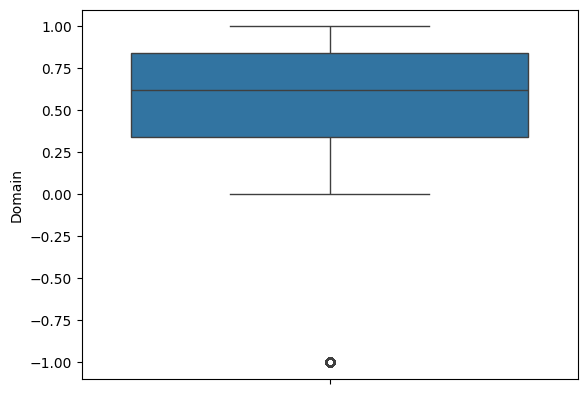

In [24]:
sns.boxplot(amcat_data['Domain'])
plt.show()

In [25]:
# List of domain-specific modules along with the Domain column
columns_to_replace = ['Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
                      'ComputerScience', 'MechanicalEngg', 'ElectricalEngg',
                      'TelecomEngg', 'CivilEngg']

# Replace -1 with NaN
amcat_data[columns_to_replace] = amcat_data[columns_to_replace].replace(-1, np.nan)

In [26]:
# Confirm Changes
print(amcat_data[columns_to_replace].isin([-1]).sum())

Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
dtype: int64


5. Personality Trait Scores

In [27]:
# List of personality trait columns
personality_columns = ['Conscientiousness', 'Agreeableness', 'Extraversion', 'Neuroticism', 'Openness_To_Experience']

# Loop through each column to find count and percentage of -1 values
for col in personality_columns:
    num_negative = (amcat_data[col] == -1).sum()
    percentage_negative = (num_negative / len(amcat_data)) * 100
    print(f"Num of -1 values in '{col}': {num_negative}")
    print(f"Percentage of -1 values in '{col}': {percentage_negative:.2f}%")
    print()

Num of -1 values in 'Conscientiousness': 0
Percentage of -1 values in 'Conscientiousness': 0.00%

Num of -1 values in 'Agreeableness': 0
Percentage of -1 values in 'Agreeableness': 0.00%

Num of -1 values in 'Extraversion': 0
Percentage of -1 values in 'Extraversion': 0.00%

Num of -1 values in 'Neuroticism': 0
Percentage of -1 values in 'Neuroticism': 0.00%

Num of -1 values in 'Openness_To_Experience': 0
Percentage of -1 values in 'Openness_To_Experience': 0.00%



In [28]:
print({col: (amcat_data[col].min(), amcat_data[col].max()) for col in personality_columns})

{'Conscientiousness': (-4.1267, 1.9953), 'Agreeableness': (-5.7816, 1.9048), 'Extraversion': (-4.6009, 2.5354), 'Neuroticism': (-2.643, 3.3525), 'Openness_To_Experience': (-7.3757, 1.8224)}


* The assessment includes both negative and positive values, indicating a scale that measures a range of personality traits.
* Negative scores suggest a **lower** presence or lack of a particular trait in the individual.
* Positive scores reflect a **stronger** presence or greater strength of that trait, providing insight into the individual’s characteristics.

6. CollegeState (Union Territory)

In [29]:
# List down the Unique values in CollegeState
print(amcat_data['CollegeState'].value_counts())

CollegeState
Uttar Pradesh        915
Karnataka            370
Tamil Nadu           367
Telangana            319
Maharashtra          262
Andhra Pradesh       225
West Bengal          196
Punjab               193
Madhya Pradesh       189
Haryana              180
Rajasthan            174
Orissa               172
Delhi                162
Uttarakhand          113
Kerala                33
Jharkhand             28
Chhattisgarh          27
Gujarat               24
Himachal Pradesh      16
Bihar                 10
Jammu and Kashmir      7
Assam                  5
Union Territory        5
Sikkim                 3
Meghalaya              2
Goa                    1
Name: count, dtype: int64


In [30]:
# List of Union Territories
union_territories = [
    'Andaman and Nicobar Islands',
    'Chandigarh',
    'Dadra and Nagar Haveli and Daman and Diu',
    'Lakshadweep',
    'Delhi',
    'Puducherry',
    'Ladakh',
    'Jammu and Kashmir'
]

# Filter the dataframe for Union Territories in the CollegeState column
union_territory_values = amcat_data[amcat_data['CollegeState'].isin(union_territories)]

# Display the filtered dataframe
print("Union Territory Values:")
print(union_territory_values['CollegeState'].value_counts())


Union Territory Values:
CollegeState
Delhi                162
Jammu and Kashmir      7
Name: count, dtype: int64


* Although **Union Territory** occurs only 5 times, it can be replaced with **Delhi**, the most frequent Union Territory in the dataset.
* This ensures consistency and aligns all entries with actual locations.

In [31]:
# Replace 'Union Territory' with 'Delhi' in the CollegeState column
amcat_data['CollegeState'].replace('Union Territory', 'Delhi', inplace=True)

# Confirm Changes
amcat_data['CollegeState'].value_counts()

,count
CollegeState,
Uttar Pradesh,915
Karnataka,370
Tamil Nadu,367
Telangana,319
Maharashtra,262
Andhra Pradesh,225
West Bengal,196
Punjab,193
Madhya Pradesh,189


#### 2.4 Fixing Column Data Types

1. ID Column

In [32]:
# ID Column
amcat_data['ID'] = amcat_data['ID'].astype(object)

2. All Tier Columns

In [33]:
# All Tier Columns
amcat_data['CollegeTier'] = amcat_data['CollegeTier'].astype(object)
amcat_data['CollegeCityTier'] = amcat_data['CollegeCityTier'].astype(object)

3. Salary Column

In [34]:
# Salary Column
amcat_data['Salary'] = amcat_data['Salary'].astype(float)

4. All Date Columns

In [35]:
# Extract Date Values from DOJ, DOB
amcat_data['DOJ'] = pd.to_datetime(amcat_data['DOJ'])
amcat_data['DOB'] = pd.to_datetime(amcat_data['DOB'])

In [36]:
# DOL Column
# Replaced 'present' with December 31, 2015, to align with the survey year and to maintain consistency.
amcat_data['DOL'] = amcat_data['DOL'].replace("present", "2015-12-31")

# Convert to datetime
amcat_data['DOL'] = pd.to_datetime(amcat_data['DOL'])

In [37]:
# Filter out rows where DOL is less than or equal to DOJ
print("Before Filtering: ", amcat_data.shape)
amcat_data = amcat_data[amcat_data['DOL'] > amcat_data['DOJ']]

# Confirm Changes
print("After Filtering: ", amcat_data.shape)

Before Filtering:  (3998, 36)
After Filtering:  (3943, 36)


In [38]:
# GraduationYear and 12Graduation
# Convert 'GraduationYear' to datetime
amcat_data['GraduationYear'] = pd.to_datetime(amcat_data['GraduationYear'], format='%Y')

# Convert '12graduation' to datetime
amcat_data['12GraduationYear'] = pd.to_datetime(amcat_data['12GraduationYear'], format='%Y')

<ipython-input-38-8cd0056f6e23>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amcat_data['GraduationYear'] = pd.to_datetime(amcat_data['GraduationYear'], format='%Y')
<ipython-input-38-8cd0056f6e23>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amcat_data['12GraduationYear'] = pd.to_datetime(amcat_data['12GraduationYear'], format='%Y')


Confirm Changes

In [39]:
# Confirm Changes
print(amcat_data.dtypes)

ID                                object
Salary                           float64
DOJ                       datetime64[ns]
DOL                       datetime64[ns]
Designation                       object
JobCity                           object
Gender                            object
DOB                       datetime64[ns]
10Percentage                     float64
10Board                           object
12GraduationYear          datetime64[ns]
12Percentage                     float64
12Board                           object
CollegeTier                       object
Degree                            object
Specialization                    object
CollegeGPA                       float64
CollegeCityTier                   object
CollegeState                      object
GraduationYear            datetime64[ns]
English                            int64
Logical                            int64
Quant                              int64
Domain                           float64
ComputerProgramm

#### 2.5 Standardizing Column Values

1. Converting Column Values to Title Case

In [40]:
# Diaply Distribution of columns based on their Data Types
# Separate the columns by data type
object_columns = amcat_data.select_dtypes(include='object').columns
numeric_columns = amcat_data.select_dtypes(include=['int64', 'float64']).columns
date_columns = amcat_data.select_dtypes(include='datetime').columns

# Print the distribution of columns by type
print(f"Object Columns ({len(object_columns)}):\n", list(object_columns), "\n")
print(f"Numerical Columns ({len(numeric_columns)}):\n", list(numeric_columns), "\n")
print(f"Date Columns ({len(date_columns)}):\n", list(date_columns), "\n")

Object Columns (11):
 ['ID', 'Designation', 'JobCity', 'Gender', '10Board', '12Board', 'CollegeTier', 'Degree', 'Specialization', 'CollegeCityTier', 'CollegeState'] 

Numerical Columns (20):
 ['Salary', '10Percentage', '12Percentage', 'CollegeGPA', 'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'Conscientiousness', 'Agreeableness', 'Extraversion', 'Neuroticism', 'Openness_To_Experience'] 

Date Columns (5):
 ['DOJ', 'DOL', 'DOB', '12GraduationYear', 'GraduationYear'] 



In [41]:
# Manually define the list of categorical columns
categorical_columns = ['Designation', 'JobCity', 'Gender', '10Board', '12Board', 'Degree', 'Specialization', 'CollegeState']

# Standardize the values by converting them to title case
for col in categorical_columns:
    amcat_data[col] = amcat_data[col].str.strip().str.title()

# Print the updated dataframe to verify
print(amcat_data[categorical_columns].head())

                Designation    JobCity Gender                         10Board  \
0   Senior Quality Engineer  Bangalore      F  Board Ofsecondary Education,Ap   
1         Assistant Manager     Indore      M                            Cbse   
2          Systems Engineer    Chennai      F                            Cbse   
3  Senior Software Engineer    Gurgaon      M                            Cbse   
4                       Get    Manesar      M                            Cbse   

                              12Board       Degree  \
0  Board Of Intermediate Education,Ap  B.Tech/B.E.   
1                                Cbse  B.Tech/B.E.   
2                                Cbse  B.Tech/B.E.   
3                                Cbse  B.Tech/B.E.   
4                                Cbse  B.Tech/B.E.   

                              Specialization    CollegeState  
0                       Computer Engineering  Andhra Pradesh  
1  Electronics And Communication Engineering  Madhya Pradesh  

2. JobCity Column

In [42]:
# Get sorted unique values from the JobCity column
print(sorted(amcat_data['JobCity'].unique()))

['A-64,Sec-64,Noida', 'Agra', 'Ahmedabad', 'Ahmednagar', 'Al Jubail,Saudi Arabia', 'Allahabad', 'Alwar', 'Am', 'Ambala', 'Ambala City', 'Angul', 'Ariyalur', 'Asansol', 'Asifabadbanglore', 'Aurangabad', 'Australia', 'Baddi Hp', 'Bahadurgarh', 'Banagalore', 'Banaglore', 'Bangalore', 'Banglore', 'Bankura', 'Bareli', 'Baripada', 'Baroda', 'Bathinda', 'Beawar', 'Belgaum', 'Bellary', 'Bengaluru', 'Bhagalpur', 'Bharuch', 'Bhilai', 'Bhiwadi', 'Bhopal', 'Bhubaneshwar', 'Bhubaneswar', 'Bhubneshwar', 'Bihar', 'Bikaner', 'Bilaspur', 'Bulandshahar', 'Bundi', 'Burdwan', 'Calicut', 'Chandigarh', 'Chandrapur', 'Chennai', 'Chennai & Mumbai', 'Chennai, Bangalore', 'Cheyyar', 'Coimbatore', 'Daman And Diu', 'Dammam', 'Dausa', 'Dehradun', 'Delhi', 'Delhi/Ncr', 'Dhanbad', 'Dharamshala', 'Dharmapuri', 'Dharuhera', 'Dubai', 'Durgapur', 'Ernakulam', 'Faridabad', 'Gagret', 'Gajiabaad', 'Gandhi Nagar', 'Gandhinagar', 'Ganjam', 'Gaziabaad', 'Ghaziabad', 'Gonda', 'Gorakhpur', 'Greater Noida', 'Gulbarga', 'Guragaon

In [43]:
# Mapping of incorrect or redundant city names to corrected forms
JobCity_corrections = {
    "A-64,Sec-64,Noida": "Noida",
    "Al Jubail,Saudi Arabia": "Al Jubail",
    "Ambala City": "Ambala",
    "Am": "Ambala",
    "Asifabadbanglore": "Asifabad",
    "Banagalore": "Bengaluru",
    "Banaglore": "Bengaluru",
    "Bangalore": "Bengaluru",
    "Banglore": "Bengaluru",
    "Bhubaneshwar": "Bhubaneswar",
    "Bhubneshwar": "Bhubaneswar",
    "Chennai & Mumbai": "Chennai",
    "Chennai, Bangalore": "Bengaluru",
    "Delhi/Ncr": "Delhi",
    "Gandhi Nagar": "Gandhinagar",
    "Gaziabaad": "Ghaziabad",
    "Gajiabaad": "Ghaziabad",
    "Greater Noida": "Noida",
    "Guragaon": "Gurugram",
    "Gurga": "Gurugram",
    "Gurgaon": "Gurugram",
    "Gurgoan": "Gurugram",
    "Hyderabad(Bhadurpally)": "Hyderabad",
    "Hderabad": "Hyderabad",
    "Indirapuram, Ghaziabad": "Ghaziabad",
    "Jeddah Saudi Arabia": "Jeddah",
    "Kochi/Cochin": "Kochi",
    "Kochi/Cochin, Chennai And Coimbatore": "Kochi",
    "Kolkata`": "Kolkata",
    "Kudankulam ,Tarapur": "Kudankulam ",
    "Latur (Maharashtra )": "Latur",
    "Mettur, Tamil Nadu": "Mettur",
    "Mumbai": "Mumbai",
    "Muzaffarpur": "Muzaffarpur",
    "Muzzafarpur": "Muzaffarpur",
    "Nasikcity": "Nashik",
    "Ncr": "Dehli",
    "New Dehli": "Delhi",
    "New Delhi - Jaisalmer": "Delhi",
    "Nouda": "Noida",
    "Navi Mumbai , Hyderabad": "Navi Mumbai",
    "Pondicherry": "Puducherry",
    "Pondy": "Puducherry",
    "Punr": "Pune",
    "Rae Bareli": "Raebareli",
    "Rayagada, Odisha": "Rayagada",
    "Sadulpur,Rajgarh,Distt-Churu,Rajasthan": "Sadulpur",
    "Surat": "Surat",
    "Sonepat": "Sonipat",
    "Technopark, Trivandrum": "Thiruvananthapuram",
    "Thiruvananthapuram": "Thiruvananthapuram",
    "Trivandrum": "Thiruvananthapuram",
    "Tirupathi": "Tirupati",
    "Trichur": "Thrissur",
    "Trichy": "Thrissur",
    "Una": "Unnao",
    "Vizag": "Visakhapatnam",
    "Vsakhapttnam": "Visakhapatnam",
    "Yamuna Nagar": "Yamunanagar",
}

# Mapping Values to the JobCity Column
amcat_data['JobCity'] = amcat_data['JobCity'].map(JobCity_corrections).fillna(amcat_data['JobCity'])

In [44]:
# Confirm Changes
# Get sorted unique values from the JobCity column
print(sorted(amcat_data['JobCity'].unique()))

['Agra', 'Ahmedabad', 'Ahmednagar', 'Al Jubail', 'Allahabad', 'Alwar', 'Ambala', 'Angul', 'Ariyalur', 'Asansol', 'Asifabad', 'Aurangabad', 'Australia', 'Baddi Hp', 'Bahadurgarh', 'Bankura', 'Bareli', 'Baripada', 'Baroda', 'Bathinda', 'Beawar', 'Belgaum', 'Bellary', 'Bengaluru', 'Bhagalpur', 'Bharuch', 'Bhilai', 'Bhiwadi', 'Bhopal', 'Bhubaneswar', 'Bihar', 'Bikaner', 'Bilaspur', 'Bulandshahar', 'Bundi', 'Burdwan', 'Calicut', 'Chandigarh', 'Chandrapur', 'Chennai', 'Cheyyar', 'Coimbatore', 'Daman And Diu', 'Dammam', 'Dausa', 'Dehli', 'Dehradun', 'Delhi', 'Dhanbad', 'Dharamshala', 'Dharmapuri', 'Dharuhera', 'Dubai', 'Durgapur', 'Ernakulam', 'Faridabad', 'Gagret', 'Gandhinagar', 'Ganjam', 'Ghaziabad', 'Gonda', 'Gorakhpur', 'Gulbarga', 'Gurugram', 'Guwahati', 'Gwalior', 'Haldia', 'Haridwar', 'Haryana', 'Hissar', 'Hospete', 'Howrah', 'Hubli', 'Hyderabad', 'Indore', 'Jabalpur', 'Jagdalpur', 'Jaipur', 'Jalandhar', 'Jammu', 'Jamnagar', 'Jamshedpur', 'Jaspur', 'Jeddah', 'Jhajjar', 'Jhansi', 'Jodh

In [45]:
# Checking and Replacing Unknown with JobCity Mode
amcat_data['JobCity'].mode()[0]         # Bengaluru

amcat_data['JobCity'] = amcat_data['JobCity'].replace('Unknown', amcat_data['JobCity'].mode()[0])

# Confirm Changes
print(amcat_data['JobCity'].value_counts().get('Unknown', 0))

0


3. 10Board and 12Board Columns

In [46]:
# Get sorted unique values from the 10Board column
print(sorted(amcat_data['10Board'].unique()))

['Aisse', 'Andhra Pradesh Board Ssc', 'Andhra Pradesh State Board', 'Anglo Indian', 'Ap State Board', 'Ap State Board For Secondary Education', 'Apsche', 'Apssc', 'Aurangabad Board', 'Bharathi Matriculation School', 'Bihar', 'Bihar Board', 'Bihar Examination Board, Patna', 'Bihar School Examination Board', 'Bihar School Examination Board Patna', 'Bihar Secondary Education Board,Patna', 'Biharboard', 'Board Of  Secondary Education', 'Board Of High School And Intermediate Education Uttarpradesh', 'Board Of Intermediate Education', 'Board Of School Education Harayana', 'Board Of School Education Haryana', 'Board Of School Education Uttarakhand', 'Board Of Secendary Education Orissa', 'Board Of Secondaray Education', 'Board Of Secondary Education', 'Board Of Secondary Education (Bse) Orissa', 'Board Of Secondary Education - Andhra Pradesh', 'Board Of Secondary Education Orissa', 'Board Of Secondary Education Rajasthan', 'Board Of Secondary Education(Bse) Orissa', 'Board Of Secondary Educat

In [47]:
# Replace the redundant values of the 10board column with 'State','CBSE','ICSE'

# State
Board10_state = ['aisse', 'andhra pradesh board ssc',
       'andhra pradesh state board', 'anglo indian', 'ap state board',
       'ap state board for secondary education', 'apsche', 'apssc',
       'aurangabad board', 'bharathi matriculation school', 'bihar',
       'bihar board', 'bihar examination board, patna',
       'bihar school examination board',
       'bihar school examination board patna',
       'bihar secondary education board,patna', 'biharboard',
       'board of  secondary education',
       'board of high school and intermediate education uttarpradesh',
       'board of intermediate education',
       'board of school education harayana',
       'board of school education haryana',
       'board of school education uttarakhand',
       'board of secendary education orissa',
       'board of secondaray education', 'board of secondary education',
       'board of secondary education (bse) orissa',
       'board of secondary education - andhra pradesh',
       'board of secondary education orissa',
       'board of secondary education rajasthan',
       'board of secondary education(bse) orissa',
       'board of secondary education, andhra pradesh',
       'board of secondary education, rajasthan',
       'board of secondary education,andhara pradesh',
       'board of secondary education,andhra pradesh',
       'board of secondary education,ap',
       'board of secondary education,odisha',
       'board of secondary education,orissa',
       'board of secondary education,rajasthan(rbse)',
       'board of secondary school education', 'board of ssc',
       'board of ssc education andhra pradesh',
       'board ofsecondary education,ap', 'board secondary  education',
       'bright way college, (up board)', 'bsc,orissa', 'bse',
       'bse(board of secondary education)', 'bse, odisha', 'bse,odisha',
       'bse,orissa', 'bseb', 'bseb ,patna', 'bseb patna', 'bseb, patna',
       'bseb,patna', 'bsemp', 'bsepatna',
       'certificate of middle years program of ib', 'cgbse',
       'cgbse raipur',  'cluny',
       'council for indian school certificate examination',
       'dav public school sec 14', 'dav public school,hehal',
       'delhi board', 'delhi public school',
       'don bosco maatriculation school', 'education board of kerala',
       'ghseb', 'gseb', 'gsheb', 'gujarat board', 'gujarat state board',
       'gyan bharati school', 'haryana board of school education',
       'haryana board of school education,(hbse)', 'hbsc', 'hbse',
       'himachal pradesh board',
       'himachal pradesh board of school education',
       'holy cross matriculation hr sec school', 'hsc', 'hsce', 'hse',
       'hse,board', 'hse,orissa',  'j & k bord',
       'j&k state board of school education',
       'jawahar navodaya vidyalaya', 'jbse,jharkhand',
       'jharkhand academic council', 'jharkhand accademic council',
       'jharkhand acedemic council', 'jharkhand secondary board',
       'jharkhand secondary education board',
       'jharkhand secondary examination board (ranchi)',
       'jharkhand secondary examination board,ranchi', 'jkbose', 'jseb',
       'kalaimagal matriculation higher secondary school',
       'karantaka secondary education and examination borad', 'karnataka',
       'karnataka board', 'karnataka board of higher education',
       'karnataka board of secondary education',
       'karnataka education board', 'karnataka education board (keeb)',
       'karnataka secondary board', 'karnataka secondary education',
       'karnataka secondary education board',
       'karnataka secondary education examination board',
       'karnataka secondary eduction',
       'karnataka secondary school of examination',
       'karnataka secondory education board',
       'karnataka sslc board bangalore', 'karnataka state board',
       'karnataka state education examination board',
       'karnataka state examination board',
       'karnataka state secondary education board', 'kea', 'kerala',
       'kerala state board', 'kerala state technical education',
       'kerala university', 'kiran english medium high school',
       'kolhapur', 'kolhapur divisional board, maharashtra', 'ksbe',
       'kseb', 'kseeb',
       'kseeb(karnataka secondary education examination board)', 'ksseb',
       'ksseb(karnataka state board)', 'latur', 'latur board',
       'little jacky matric higher secondary school',
       'madhya pradesh board', 'maharashtra', 'maharashtra board',
       'maharashtra board, pune', 'maharashtra nasik board',
       'maharashtra satate board', 'maharashtra sate board',
       'maharashtra state boar of secondary and higher secondary education',
       'maharashtra state board', 'maharashtra state board for ssc',
       'maharashtra state board mumbai divisional board',
       'maharashtra state board of secondary & higher secondary education',
       'maharashtra state board of secondary and higher secondary education',
       'maharashtra state board of secondary and higher secondary education,pune',
       'maharashtra state board pune', 'maharashtra state board,pune',
       'maharashtra state(latur board)', 'maharastra board',
       'maticulation', 'matric', 'matric board', 'matriculation',
       'matriculation board', 'metric', 'mhsbse', 'mirza ahmed ali baig',
       'mp', 'mp board', 'mp board bhopal', 'mp state board', 'mp-bse',
       'mpboard', 'mpbse', 'ms board', 'msbshse,pune', 'mumbai board',
       'nagpur', 'nagpur board', 'nagpur board,nagpur',
       'nagpur divisional board', 'nashik board', 'nasik',
       'national public school', 'pseb', 'pune', 'pune board',
       'punjab school education board, mohali', 'rajasthan board',
       'rajasthan board ajmer', 'rajasthan board of secondary education',
       'rbse', 'rbse (state board)', 'rbse,ajmer', 'sarada high scchool',
       'school secondary education, andhra pradesh', 'seba',
       'seba(assam)', 'secondary board of rajasthan',
       'secondary education board of rajasthan',
       'secondary school cerfificate', 'secondary school certificate',
       'secondary school education', 'secondary school of education',
       'secondary state certificate',
       'sri kannika parameswari highier secondary school, udumalpet',
       'ssc', 'ssc board of andrapradesh', 'ssc maharashtra board',
       'ssc regular', 'ssc-andhra pradesh', 'sslc', 'sslc board',
       'sslc,karnataka', 'sss pune', 'state', 'state board',
       'state board ', 'state board (jac, ranchi)',
       'state board - west bengal board of secondary education : wbbse',
       'state board of karnataka',
       'state board of secondary education( ssc)',
       'state board of secondary education, andhra pradesh',
       'state board of secondary education, ap',
       'state board of secondary education,andhra pradesh',
       'state boardmp board ', 'state borad hp', 'state bord',
       'state(karnataka board)', 'stateboard',
       'stjoseph of cluny matrhrsecschool,neyveli,cuddalore district',
       'stjosephs girls higher sec school,dindigul',
       'stmary higher secondary', "stmary's convent inter college",
       'tamil nadu state', 'tamilnadu matriculation board',
       'tamilnadu state board', 'tn state board', 'u p', 'u p board',
       'ua', 'up', 'up baord', 'up board', 'up board , allahabad',
       'up board allahabad', 'up board,allahabad', 'up borad', 'up bord',
       'up bourd', 'up(allahabad)', 'up-board', 'upbhsie', 'upboard',
       'uttar pradesh', 'uttar pradesh board', 'uttarakhand board',
       'uttaranchal shiksha avam pariksha parishad',
       'uttaranchal state board', 'uttrakhand board', 'uttranchal board',
       'wbbsce', 'wbbse', 'west bengal  board of secondary education',
       'west bengal board of secondary education',
       'west bengal board of secondary eucation',
       'west bengal board of secondary examination (wbbse)', 'State Boardmp Board']

Board10_state_title = [x.title() for x in Board10_state]

for i in Board10_state_title:
    amcat_data['10Board'].replace(i,'State',inplace=True)

# CBSE
Board10_cbse=['cbsc', 'cbse', 'cbse ', 'cbse board', 'cbse[gulf zone]', 'central board of secondary education', 'central board of secondary education, new delhi']

Board10_cbse_title = [x.title() for x in Board10_cbse]

for i in Board10_cbse_title:
    amcat_data['10Board'].replace(i,'CBSE',inplace=True)

# ICSE
Board10_icse= ['icse', 'icse board', 'icse', 'icse board , new delhi', 'cicse', 'icse board', 'new delhi']

Board10_icse_title = [x.title() for x in Board10_icse]

for i in Board10_icse_title:
    amcat_data['10Board'].replace(i,'ICSE',inplace=True)

# Unique Values in 10Board
amcat_data['10Board'].unique()

array(['State', 'CBSE', 'ICSE', 'Unknown'], dtype=object)

In [48]:
# Get sorted unique values from the 12Board column
print(sorted(amcat_data['10Board'].unique()))

['CBSE', 'ICSE', 'State', 'Unknown']


In [49]:
# Checking and Replacing Unknown with 10Board Mode
amcat_data['10Board'].mode()[0]         # State

amcat_data['10Board'] = amcat_data['10Board'].replace('Unknown', amcat_data['10Board'].mode()[0])

# Confirm Changes
print(amcat_data['10Board'].value_counts().get('Unknown', 0))

0


In [50]:
# Replace the redundant values of the 12board column with 'State','CBSE','ICSE'

# State
Board12_state = ['board of intermediate education,ap', 'state board',
       'mp board',  'karnataka pre university board', 'up',
       'p u board, karnataka', 'dept of pre-university education', 'bie',
       'kerala state hse board', 'up board', 'bseb', 'chse', 'puc',
       ' upboard',
       'state  board of intermediate education, andhra pradesh',
       'karnataka state board',
       'west bengal state council of technical education', 'wbchse',
       'maharashtra state board', 'ssc',
       'sda matric higher secondary school', 'uttar pradesh board', 'ibe',
       'chsc', 'board of intermediate', 'upboard', 'sbtet',
       'hisher seconadry examination(state board)', 'pre university',
       'borad of intermediate', 'j & k board',
       'intermediate board of andhra pardesh', 'rbse',
       'central board of secondary education', 'jkbose', 'hbse',
       'board of intermediate education', 'state', 'ms board', 'pue',
       'intermediate state board', 'stateboard', 'hsc',
       'electonincs and communication(dote)', 'karnataka pu board',
       'government polytechnic mumbai , mumbai board', 'pu board',
       'baord of intermediate education', 'apbie', 'andhra board',
       'tamilnadu stateboard',
       'west bengal council of higher secondary education',
       'cbse,new delhi', 'u p board', 'intermediate', 'biec,patna',
       'diploma in engg (e &tc) tilak maharashtra vidayapeeth',
       'hsc pune', 'pu board karnataka', 'kerala', 'gsheb',
       'up(allahabad)', 'nagpur', 'st joseph hr sec school',
       'pre university board', 'ipe', 'maharashtra', 'kea', 'apsb',
       'himachal pradesh board of school education', 'staae board',
       'international baccalaureate (ib) diploma', 'nios',
       'karnataka board of university',
       'board of secondary education rajasthan', 'uttarakhand board',
       'ua', 'scte vt orissa', 'matriculation',
       'department of pre-university education', 'wbscte',
       'preuniversity board(karnataka)', 'jharkhand accademic council',
       'bieap', 'msbte (diploma in computer technology)',
       'jharkhand acamedic council (ranchi)',
       'department of pre-university eduction', 'biec',
       'sjrcw', ' board of intermediate', 'msbte',
       'sri sankara vidyalaya', 'chse, odisha', 'bihar board',
       'maharashtra state(latur board)', 'rajasthan board', 'mpboard',
       'state board of technical eduction panchkula', 'upbhsie', 'apbsc',
       'state board of technical education and training',
       'secondary board of rajasthan',
       'tamilnadu higher secondary education board',
       'jharkhand academic council',
       'board of intermediate education,hyderabad', 'up baord', 'pu',
       'dte', 'board of secondary education', 'pre-university',
       'board of intermediate education,andhra pradesh',
       'up board , allahabad', 'srv girls higher sec school,rasipuram',
       'intermediate board of education,andhra pradesh',
       'intermediate board examination',
       'department of pre-university education, bangalore',
       'stmiras college for girls', 'mbose',
       'department of pre-university education(government of karnataka)',
       'dpue', 'msbte pune', 'board of school education harayana',
       'sbte, jharkhand', 'bihar intermediate education council, patna',
       'higher secondary', 's j polytechnic', 'latur',
       'board of secondary education, rajasthan', 'jyoti nivas', 'pseb',
       'biec-patna', 'board of intermediate education,andra pradesh',
       'chse,orissa', 'pre-university board', 'mp', 'intermediate board',
       'govt of karnataka department of pre-university education',
       'karnataka education board',
       'board of secondary school of education', 'pu board ,karnataka',
       'karnataka secondary education board', 'karnataka sslc',
       'board of intermediate ap', 'u p', 'state board of karnataka',
       'directorate of technical education,banglore', 'matric board',
       'andhpradesh board of intermediate education',
       'stjoseph of cluny matrhrsecschool,neyveli,cuddalore district',
       'bte up', 'scte and vt ,orissa', 'hbsc',
       'jawahar higher secondary school', 'nagpur board', 'bsemp',
       'board of intermediate education, andhra pradesh',
       'board of higher secondary orissa',
       'board of secondary education,rajasthan(rbse)',
       'board of intermediate education:ap,hyderabad', 'science college',
       'karnatak pu board', 'aissce', 'pre university board of karnataka',
       'bihar', 'kerala state board', 'uo board',
       'karnataka board', 'tn state board',
       'kolhapur divisional board, maharashtra',
       'jaycee matriculation school',
       'board of higher secondary examination, kerala',
       'uttaranchal state board', 'intermidiate', 'bciec,patna', 'bice',
       'karnataka state', 'state broad', 'wbbhse', 'gseb',
       'uttar pradesh', 'ghseb', 'board of school education uttarakhand',
       'gseb/technical education board', 'msbshse,pune',
       'tamilnadu state board', 'board of technical education',
       'kerala university', 'uttaranchal shiksha avam pariksha parishad',
       'chse(concil of higher secondary education)',
       'bright way college, (up board)', 'board of intermidiate',
       'higher secondary state certificate', 'karanataka secondary board',
       'maharashtra board', 'cgbse', 'diploma in computers', 'bte,delhi',
       'rajasthan board ajmer', 'mpbse', 'pune board',
       'state board of technical education', 'gshseb',
       'amravati divisional board', 'dote (diploma - computer engg)',
       'karnataka pre-university board', 'jharkhand board',
       'punjab state board of technical education & industrial training',
       'department of technical education',
       'sri chaitanya junior kalasala', 'state board (jac, ranchi)',
       'aligarh muslim university', 'tamil nadu state board', 'hse',
       'karnataka secondary education', 'state board ',
       'karnataka pre unversity board',
       'ks rangasamy institute of technology',
       'karnataka board secondary education', 'narayana junior college',
       'bteup', 'board of intermediate(bie)', 'hsc maharashtra board',
       'tamil nadu state', 'uttrakhand board', 'psbte',
       'stateboard/tamil nadu', 'intermediate council patna',
       'technical board, punchkula', 'board of intermidiate examination',
       'sri kannika parameswari highier secondary school, udumalpet',
       'ap board', 'nashik board', 'himachal pradesh board',
       'maharashtra satate board',
       'andhra pradesh board of secondary education',
       'tamil nadu polytechnic',
       'maharashtra state board mumbai divisional board',
       'department of pre university education',
       'dav public school,hehal', 'board of intermediate education, ap',
       'rajasthan board of secondary education',
       'department of technical education, bangalore', 'chse,odisha',
       'maharashtra nasik board',
       'west bengal council of higher secondary examination (wbchse)',
       'holy cross matriculation hr sec school', 'cbsc',
       'pu  board karnataka', 'biec patna', 'kolhapur', 'bseb, patna',
       'up board allahabad', 'nagpur board,nagpur', 'diploma(msbte)',
       'dav public school', 'pre university board, karnataka',
       'ssm srsecschool', 'state bord', 'jstb,jharkhand',
       'intermediate board of education', 'mp board bhopal', 'pub',
       'madhya pradesh board', 'bihar intermediate education council',
       'west bengal council of higher secondary eucation',
        'mpc',
       'certificate for higher secondary education (chse)orissa',
       'maharashtra state board for hsc',
       'board of intermeadiate education', 'latur board',
       'andhra pradesh', 'karnataka pre-university',
       'lucknow public college', 'nagpur divisional board',
       'ap intermediate board', 'cgbse raipur', 'uttranchal board',
       'jiec',
       'bihar school examination board patna',
       'state board of technical education harayana', 'mp-bse',
       'up bourd', 'dav public school sec 14',
       'haryana state board of technical education chandigarh',
       'council for indian school certificate examination',
       'jaswant modern school', 'madhya pradesh open school',
       'aurangabad board', 'j&k state board of school education',
       'diploma ( maharashtra state board of technical education)',
       'board of technicaleducation ,delhi',
       'maharashtra state boar of secondary and higher secondary education',
       'hslc (tamil nadu state board)',
       'karnataka state examination board', 'puboard', 'nasik',
       'west bengal board of higher secondary education',
       'up board,allahabad', 'board of intrmediate education,ap',
       'karnataka state pre- university board',
       'state board - west bengal council of higher secondary education : wbchse',
       'maharashtra state board of secondary & higher secondary education',
       'biec, patna', 'state syllabus', 'cbse board', 'scte&vt',
       'board of intermediate,ap',
       'secnior secondary education board of rajasthan',
       'maharashtra board, pune', 'rbse (state board)',
       'board of intermidiate education,ap',
       'board of high school and intermediate education uttarpradesh',
       'higher secondary education',
       'board fo intermediate education, ap', 'intermedite',
       'ap board for intermediate education', 'ahsec',
       'punjab state board of technical education & industrial training, chandigarh',
       'state board - tamilnadu', 'jharkhand acedemic council',
       'scte & vt (diploma)', 'karnataka pu',
       'board of intmediate education ap', 'up-board',
       'boardofintermediate','intermideate','up bord','andhra pradesh state board','gujarat board']

Board12_state_title = [x.title() for x in Board12_state]

for i in Board12_state_title:
    amcat_data['12Board'].replace(i,'State',inplace=True)

# CBSE
Board12_cbse=['Cbse', 'All India Board', 'Central Board Of Secondary Education, New Delhi', 'Cbese']

Board12_cbse_title = [x.title() for x in Board12_cbse]

for i in Board12_cbse_title:
    amcat_data['12Board'].replace(i,'CBSE',inplace=True)

# ICSE
Board12_icse=[ 'Isc', 'Icse', 'Isc Board', 'Isce', 'Cicse', 'Isc Board , New Delhi']

Board12_icse_title = [x.title() for x in Board12_icse]

for i in Board12_icse_title:
    amcat_data['12Board'].replace(i,'ICSE',inplace=True)

# Unique Values in 12Board
amcat_data['12Board'].unique()

array(['State', 'CBSE', 'ICSE', 'Unknown'], dtype=object)

In [51]:
# Checking and Replacing Unknown with 12Board Mode
amcat_data['12Board'].mode()[0]         # State

amcat_data['12Board'] = amcat_data['12Board'].replace('Unknown', amcat_data['12Board'].mode()[0])

# Confirm Changes
print(amcat_data['12Board'].value_counts().get('Unknown', 0))

0


4. Specialisation Column

In [52]:
# Replace the redundant values of the specialization column with 'CS', 'EC', 'ME', 'EL', 'CE', 'Other'
specialization = {
    'Electronics And Communication Engineering': 'EC',
    'Computer Science & Engineering': 'CS',
    'Information Technology': 'CS',
    'Computer Engineering': 'CS',
    'Computer Application': 'CS',
    'Mechanical Engineering': 'ME',
    'Electronics And Electrical Engineering': 'EC',
    'Electronics & Telecommunications': 'EC',
    'Electrical Engineering': 'EL',
    'Electronics & Instrumentation Eng': 'EC',
    'Civil Engineering': 'CE',
    'Electronics And Instrumentation Engineering': 'EC',
    'Information Science Engineering': 'CS',
    'Instrumentation And Control Engineering': 'EC',
    'Electronics Engineering': 'EC',
    'Biotechnology': 'Other',
    'Other': 'Other',
    'Industrial & Production Engineering': 'Other',
    'Chemical Engineering': 'Other',
    'Applied Electronics And Instrumentation': 'EC',
    'Computer Science And Technology': 'CS',
    'Telecommunication Engineering': 'EC',
    'Mechanical And Automation': 'ME',
    'Automobile/Automotive Engineering': 'ME',
    'Instrumentation Engineering': 'EC',
    'Mechatronics': 'ME',
    'Electronics And Computer Engineering': 'CS',
    'Aeronautical Engineering': 'ME',
    'Computer Science': 'CS',
    'Metallurgical Engineering': 'Other',
    'Biomedical Engineering': 'Other',
    'Industrial Engineering': 'Other',
    'Information & Communication Technology': 'EC',
    'Electrical And Power Engineering': 'EL',
    'Industrial & Management Engineering': 'Other',
    'Computer Networking': 'CS',
    'Embedded Systems Technology': 'EC',
    'Power Systems And Automation': 'EL',
    'Computer And Communication Engineering': 'CS',
    'Information Science': 'CS',
    'Internal Combustion Engine': 'ME',
    'Ceramic Engineering': 'Other',
    'Mechanical & Production Engineering': 'ME',
    'Control And Instrumentation Engineering': 'EC',
    'Electronics': 'EC',
    'Polymer Technology': 'Other'
}

# Convert Specialization to title case
amcat_data['Specialization'] = amcat_data['Specialization'].str.title()

# Replace the values based on the specialization mapping
amcat_data['Specialization'] = amcat_data['Specialization'].map(specialization)

# Display unique values in the Specialization column
print(amcat_data['Specialization'].unique())

['CS' 'EC' 'ME' 'EL' 'CE' 'Other']


6. CollegeGPA

In [53]:
print((amcat_data['10Percentage'] <=10 ).sum())
print((amcat_data['12Percentage'] <=10 ).sum())
print((amcat_data['CollegeGPA'] <=10 ).sum())

0
0
12


In [54]:
amcat_data.loc[amcat_data['CollegeGPA']<=10, 'CollegeGPA'] = (amcat_data.loc[amcat_data['CollegeGPA']<=10, 'CollegeGPA'] / 10) * 100

In [55]:
amcat_data['CollegeGPA'].head()
print((amcat_data['CollegeGPA'] <=10 ).sum())

0


#### 2.6 Adding Columns

1. Experience Column

In [56]:
amcat_data['Experience'] = np.round((amcat_data['DOL'] - amcat_data['DOJ']).dt.total_seconds() / (365.25 * 24 * 60 * 60), 2)


# Confirm Changes
print(amcat_data.columns)

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10Percentage', '10Board', '12GraduationYear', '12Percentage',
       '12Board', 'CollegeTier', 'Degree', 'Specialization', 'CollegeGPA',
       'CollegeCityTier', 'CollegeState', 'GraduationYear', 'English',
       'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'Conscientiousness',
       'Agreeableness', 'Extraversion', 'Neuroticism',
       'Openness_To_Experience', 'Experience'],
      dtype='object')


In [57]:
cols = list(amcat_data.columns)

cols.insert(cols.index('DOL') + 1, cols.pop(cols.index('Experience')))

amcat_data = amcat_data[cols]

# Confirm Changes
print(amcat_data.columns)

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Experience', 'Designation', 'JobCity',
       'Gender', 'DOB', '10Percentage', '10Board', '12GraduationYear',
       '12Percentage', '12Board', 'CollegeTier', 'Degree', 'Specialization',
       'CollegeGPA', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'Conscientiousness',
       'Agreeableness', 'Extraversion', 'Neuroticism',
       'Openness_To_Experience'],
      dtype='object')


2. Age Column

In [58]:
# The age of each individual will be calculated by subtracting their birth year from 2015, reflecting their age at the dataset's release
amcat_data['DOB'] = pd.to_datetime(amcat_data['DOB'])
amcat_data['Age'] = 2015 - amcat_data['DOB'].dt.year

amcat_data['Age'] = amcat_data['Age'].astype(int)

In [59]:
cols = list(amcat_data.columns)

cols.insert(cols.index('DOB') + 1, cols.pop(cols.index('Age')))

amcat_data = amcat_data[cols]

# Confirm Changes
print(amcat_data.columns)

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Experience', 'Designation', 'JobCity',
       'Gender', 'DOB', 'Age', '10Percentage', '10Board', '12GraduationYear',
       '12Percentage', '12Board', 'CollegeTier', 'Degree', 'Specialization',
       'CollegeGPA', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'Conscientiousness',
       'Agreeableness', 'Extraversion', 'Neuroticism',
       'Openness_To_Experience'],
      dtype='object')


### 3. Univariate Analysis

In [60]:
# Copy of the Cleaned Data
amcat_clean = amcat_data.copy()

In [61]:
amcat_clean.shape

(3943, 38)

In [62]:
# Descriptive Statistics
amcat_clean.describe()

,Salary,DOJ,DOL,Experience,DOB,Age,10Percentage,12GraduationYear,12Percentage,CollegeGPA,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,Conscientiousness,Agreeableness,Extraversion,Neuroticism,Openness_To_Experience
count,3.943000e+03,3943,3943,3943.000000,3943,3943.000000,3943.000000,3943,3943.000000,3943.000000,3943,3943.000000,3943.000000,3943.000000,3701.000000,3082.000000,1128.000000,883.000000,235.000000,154.000000,372.000000,42.000000,3943.00000,3943.000000,3943.000000,3943.000000,3943.000000
mean,3.082562e+05,2013-06-27 08:21:03.606391040,2015-03-29 13:27:27.983768832,1.752835,1990-12-01 07:06:11.595232,24.586102,77.946551,2008-01-28 08:47:21.288359168,74.459954,71.699419,2012-08-07 03:15:23.053512448,501.786203,501.607152,513.307380,0.610209,451.736859,335.902482,405.740657,406.876596,431.701299,350.158602,349.666667,-0.03948,0.146107,-0.001356,-0.170278,-0.139331
min,3.500000e+04,1991-06-01 00:00:00,2005-03-01 00:00:00,0.080000,1977-10-30 00:00:00,18.000000,43.000000,1995-01-01 00:00:00,40.000000,49.070000,2007-01-01 00:00:00,180.000000,195.000000,120.000000,0.002750,105.000000,133.000000,130.000000,180.000000,206.000000,153.000000,166.000000,-4.12670,-5.781600,-4.600900,-2.643000,-7.375700
25%,1.800000e+05,2012-09-01 00:00:00,2014-12-01 00:00:00,0.910000,1989-11-12 00:00:00,23.000000,71.800000,2007-01-01 00:00:00,66.000000,66.500000,2012-01-01 00:00:00,425.000000,445.000000,430.000000,0.376060,385.000000,292.000000,346.000000,362.000000,366.000000,286.000000,292.000000,-0.72640,-0.287100,-0.604800,-0.868200,-0.669200
50%,3.000000e+05,2013-10-01 00:00:00,2015-05-01 00:00:00,1.500000,1991-03-01 00:00:00,24.000000,79.200000,2008-01-01 00:00:00,74.400000,71.770000,2013-01-01 00:00:00,500.000000,505.000000,515.000000,0.649390,455.000000,333.000000,407.000000,407.000000,420.000000,356.000000,348.000000,0.04640,0.212400,0.091400,-0.234400,-0.094300
75%,3.725000e+05,2014-07-01 00:00:00,2015-12-31 00:00:00,2.410000,1992-03-08 12:00:00,26.000000,85.725000,2009-01-01 00:00:00,82.580000,76.400000,2014-01-01 00:00:00,570.000000,565.000000,595.000000,0.842248,515.000000,388.000000,469.000000,446.000000,500.000000,393.000000,388.000000,0.70270,0.812800,0.672000,0.526200,0.502400
max,4.000000e+06,2015-12-01 00:00:00,2015-12-31 00:00:00,24.580000,1997-05-27 00:00:00,38.000000,97.760000,2013-01-01 00:00:00,98.700000,99.930000,2017-01-01 00:00:00,875.000000,795.000000,900.000000,0.999910,840.000000,612.000000,715.000000,623.000000,676.000000,548.000000,516.000000,1.99530,1.904800,2.535400,3.352500,1.822400
std,2.117631e+05,NaN,NaN,1.207662,NaN,1.769472,9.839517,NaN,11.001894,7.417355,NaN,104.804712,86.654853,122.213111,0.273295,97.358774,81.474016,90.072241,84.894993,99.732789,75.808377,79.784670,1.02746,0.941440,0.952427,1.007118,1.006140


#### 3.1 Numerical Variables

In [63]:
# Statistical Summary for Numerical Columns
print("Statistical Summary for Numerical Columns:")
numerical_columns = amcat_clean.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_columns:
    print(f"\nSummary for {column}:")
    print(amcat_clean[column].describe())

Statistical Summary for Numerical Columns:

Summary for Salary:
count    3.943000e+03
mean     3.082562e+05
std      2.117631e+05
min      3.500000e+04
25%      1.800000e+05
50%      3.000000e+05
75%      3.725000e+05
max      4.000000e+06
Name: Salary, dtype: float64

Summary for Experience:
count    3943.000000
mean        1.752835
std         1.207662
min         0.080000
25%         0.910000
50%         1.500000
75%         2.410000
max        24.580000
Name: Experience, dtype: float64

Summary for Age:
count    3943.000000
mean       24.586102
std         1.769472
min        18.000000
25%        23.000000
50%        24.000000
75%        26.000000
max        38.000000
Name: Age, dtype: float64

Summary for 10Percentage:
count    3943.000000
mean       77.946551
std         9.839517
min        43.000000
25%        71.800000
50%        79.200000
75%        85.725000
max        97.760000
Name: 10Percentage, dtype: float64

Summary for 12Percentage:
count    3943.000000
mean       74.4

##### 1. Salary (Target Variable)

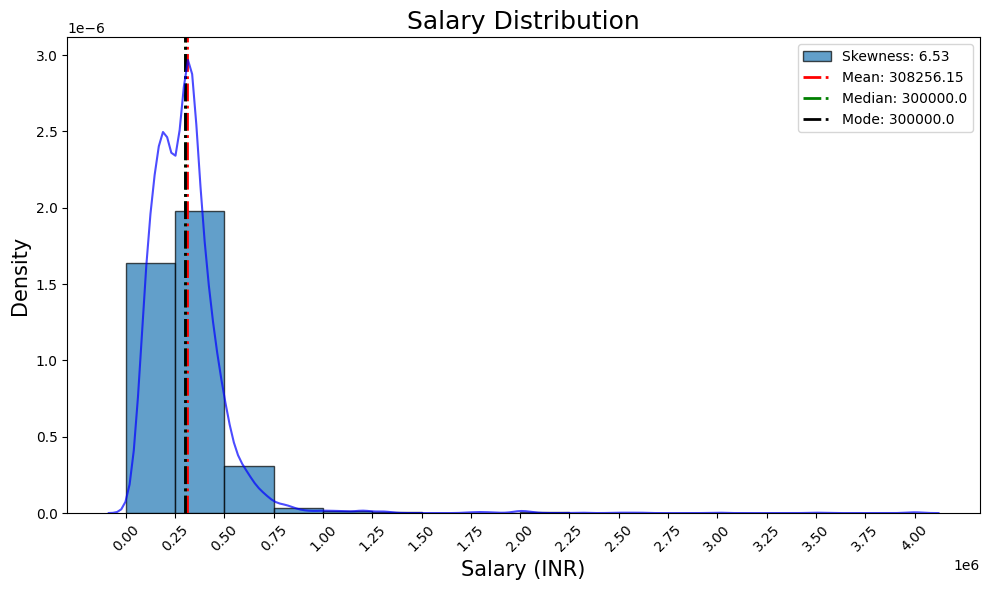

In [64]:
# Define bins with 250000 increments for Salary
bins = np.arange(0, amcat_clean['Salary'].max() + 250000, 250000)

# Create a histogram for Salary
plt.figure(figsize=(10,6))
plt.hist(amcat_clean['Salary'], bins=bins, edgecolor='k',
         label=f"Skewness: {round(amcat_clean['Salary'].skew(), 2)}", alpha=0.7, density=True)

# Add labels and title
plt.xticks(bins, rotation=45)
plt.xlabel('Salary (INR)', size=15)
plt.ylabel('Density', size=15)
plt.title('Salary Distribution', size=18)

# Add vertical lines for mean, median, and mode
plt.axvline(amcat_clean['Salary'].mean(), label=f"Mean: {round(amcat_clean['Salary'].mean(), 2)}",
            linestyle='-.', color='red', linewidth=2)
plt.axvline(amcat_clean['Salary'].median(), label=f"Median: {round(amcat_clean['Salary'].median(), 2)}",
            linestyle='-.', color='green', linewidth=2)
plt.axvline(amcat_clean['Salary'].mode()[0], label=f"Mode: {round(amcat_clean['Salary'].mode()[0], 2)}",
            linestyle='-.', color='black', linewidth=2)

# Overlay a KDE plot
sns.kdeplot(amcat_clean['Salary'], color='blue', alpha=0.7)

# Show the legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

**Histogram**:
* Displays the distribution of salaries in 250,000 INR increments.
* It includes lines for the mean, median, and mode, along with a KDE plot for smoother distribution.

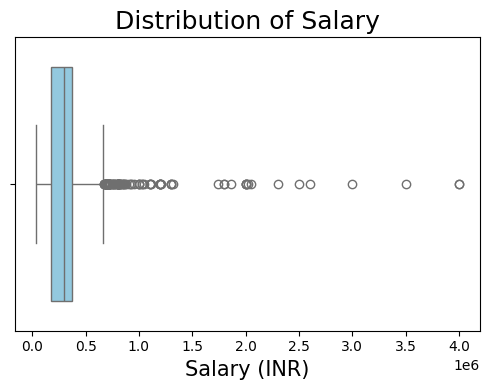

In [65]:
# Create a box plot for Salary
plt.figure(figsize=(5,4))
sns.boxplot(x=amcat_clean['Salary'], color='skyblue')

# Add labels and title
plt.xlabel('Salary (INR)', size=15)
plt.title('Distribution of Salary', size=18)

# Show the plot
plt.tight_layout()
plt.show()

**Box Plot**:
* Visualizes the spread of the salary data, helping to detect outliers and understand the range and median salary.

**OBSERVATION**

---
* The mean salary is ₹308,256, slightly higher than the median of ₹300,000, indicating a right-skewed distribution.
* Salaries range from ₹35,000 to ₹4,000,000, showing significant variation across individuals.
* The standard deviation of ₹211,763 reflects substantial spread around the mean salary.
* 50% of individuals earn between ₹180,000 (25th percentile) and ₹372,500 (75th percentile).
* High number of outliers present as indicated by the Box Plot.

##### 2. 10Percentage, 12Percentage, CollegeGPA

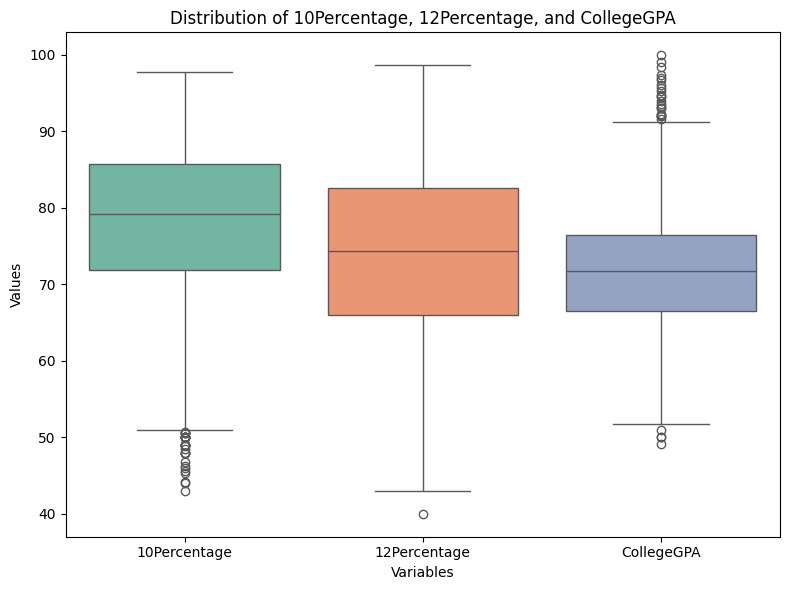

In [66]:
# Define the three columns
columns = ['10Percentage', '12Percentage', 'CollegeGPA']

plt.figure(figsize=(8,6))

sns.boxplot(data=amcat_clean[columns], palette="Set2")

plt.title('Distribution of 10Percentage, 12Percentage, and CollegeGPA')
plt.xlabel('Variables')
plt.ylabel('Values')

plt.tight_layout()
plt.show()


**OBSERVATION**

---


* **10Percentage**: The average score is 77.95, with most students scoring between 71.80 and 85.73.
* **12Percentage**: The average score is 74.46, with higher variability, and most students scoring between 66.00 and 82.58.
* **CollegeGPA**: The average GPA is 71.70, with most students scoring between 66.50 and 76.40.

**Conclusion:**
* **10Percentage** and **12Percentage** show similar distribution patterns, though students performed slightly better in 10th grade than in 12th grade on average.
* **CollegeGPA** has a slightly lower mean compared to the high school percentages, but it shows less variability, indicating a more consistent academic performance during college.

##### 3. AMCAT Scores

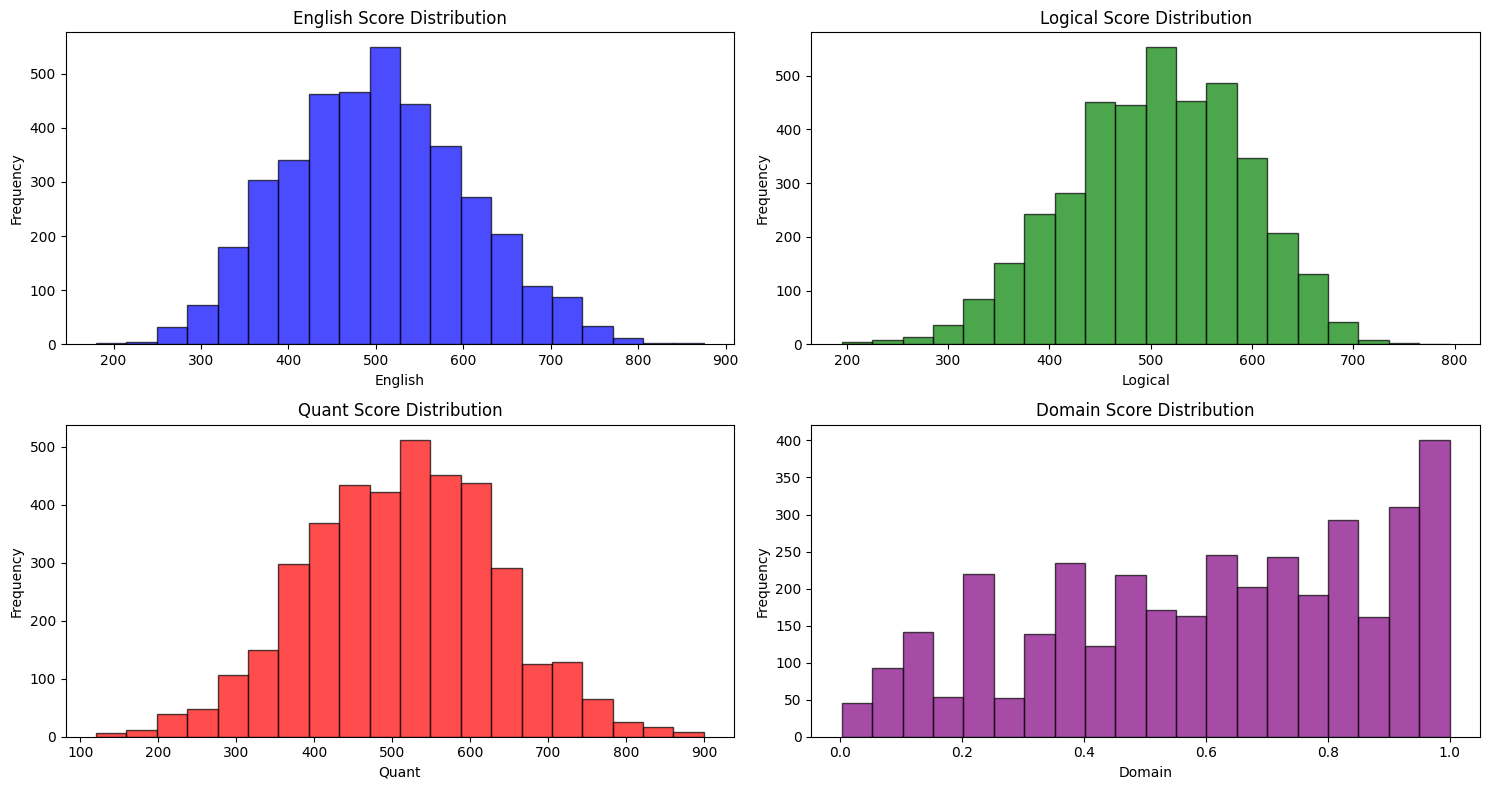

In [67]:
# Skill Assessment - Histogram
plt.figure(figsize=(15, 8))

# English
plt.subplot(2, 2, 1)
plt.hist(amcat_clean['English'].dropna(), bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.title('English Score Distribution')
plt.xlabel('English')
plt.ylabel('Frequency')

# Logical
plt.subplot(2, 2, 2)
plt.hist(amcat_clean['Logical'].dropna(), bins=20, color='green', edgecolor='black', alpha=0.7)
plt.title('Logical Score Distribution')
plt.xlabel('Logical')
plt.ylabel('Frequency')

# Quant
plt.subplot(2, 2, 3)
plt.hist(amcat_clean['Quant'].dropna(), bins=20, color='red', edgecolor='black', alpha=0.7)
plt.title('Quant Score Distribution')
plt.xlabel('Quant')
plt.ylabel('Frequency')

# Domain
plt.subplot(2, 2, 4)
plt.hist(amcat_clean['Domain'].dropna(), bins=20, color='purple', edgecolor='black', alpha=0.7)
plt.title('Domain Score Distribution')
plt.xlabel('Domain')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

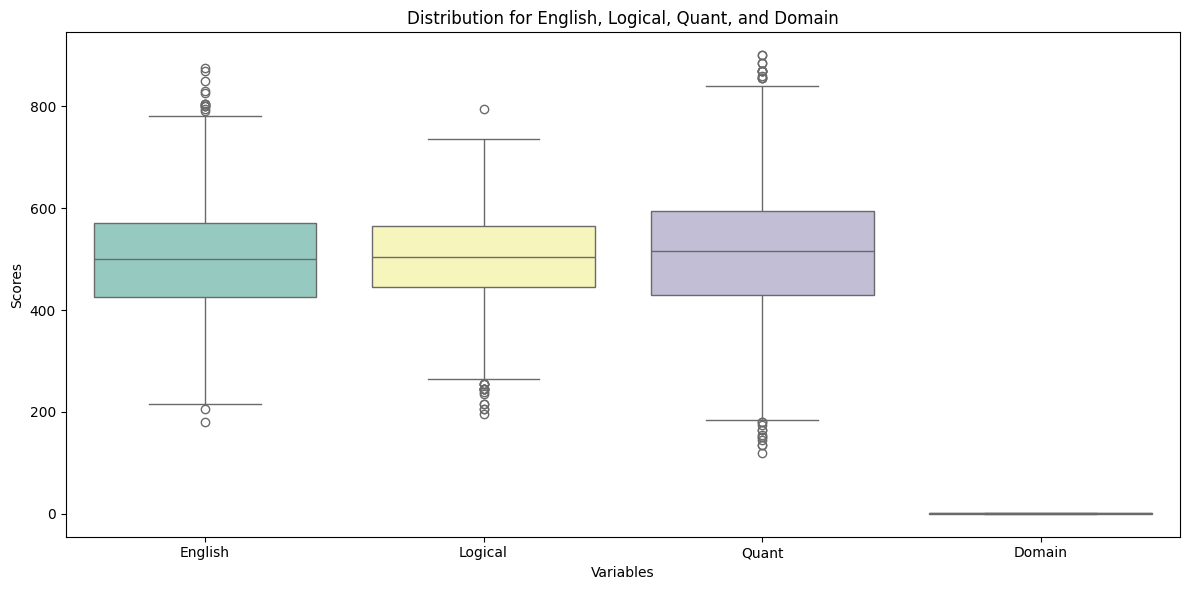

In [68]:
# Skill Assessment - Boxplot
plt.figure(figsize=(12, 6))

sns.boxplot(data=amcat_clean[['English', 'Logical', 'Quant', 'Domain']], palette='Set3')

plt.title('Distribution for English, Logical, Quant, and Domain')
plt.xlabel('Variables')
plt.ylabel('Scores')

plt.tight_layout()
plt.show()

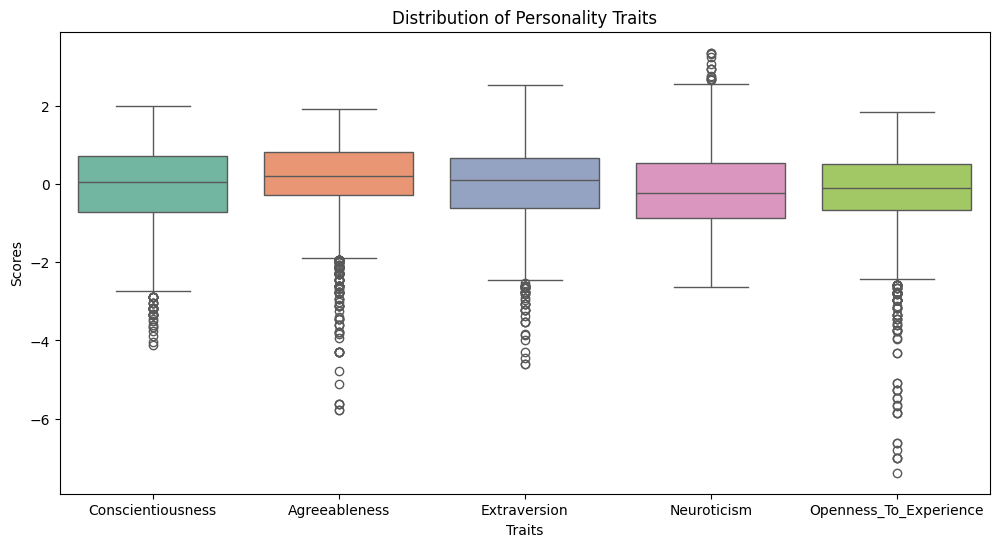

In [69]:
# Personality Traits
plt.figure(figsize=(12, 6))

sns.boxplot(data = amcat_clean[['Conscientiousness', 'Agreeableness', 'Extraversion', 'Neuroticism', 'Openness_To_Experience']], palette='Set2')

plt.title('Distribution of Personality Traits')
plt.ylabel('Scores')
plt.xlabel('Traits')

plt.show()

**OBSERVATION**

---
* The average scores for **English** (501.79), **Logical** (501.61), and **Quant** (513.31) reflect significant variability in student proficiency across these core subjects, with Quant demonstrating the highest average performance.
* The average **Domain** score of 0.61 reflects varying participation and performance levels due to students selecting different fields based on their specializations and interests.
* The engineering-related variables exhibit fewer data points and high proportions of missing values (over 70%), indicating that visual analysis may not yield meaningful insights due to insufficient data.
* **Personality traits** exhibit significant variability, with conscientiousness and neuroticism showing low average scores, likely reflecting the diverse backgrounds and experiences of respondents.


##### 4. Age

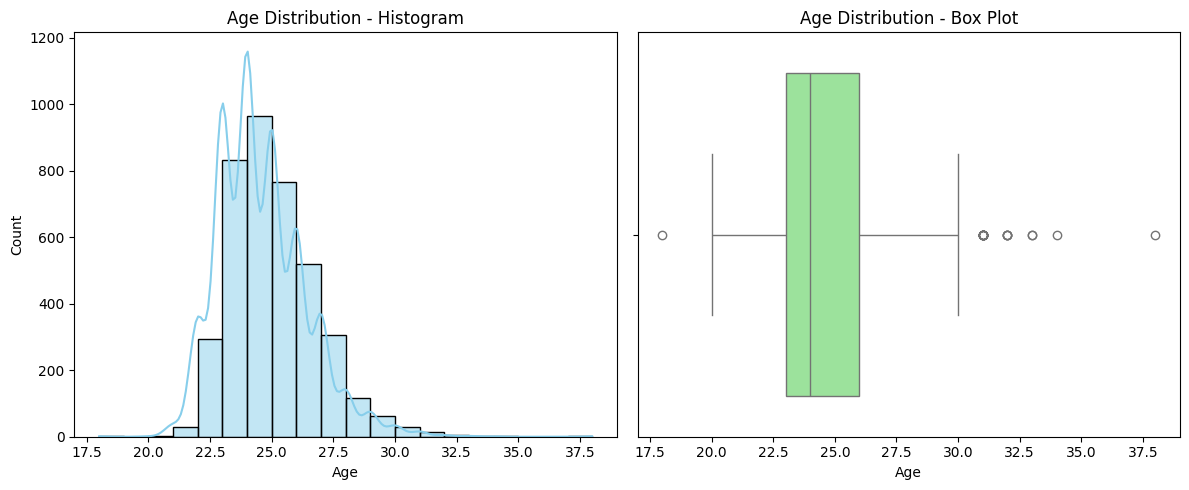

In [70]:
plt.figure(figsize=(12, 5))

# Subplot 1: Histogram for Age
plt.subplot(1, 2, 1)
sns.histplot(amcat_clean['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution - Histogram')

# Subplot 2: Box Plot for Age
plt.subplot(1, 2, 2)
sns.boxplot(x=amcat_clean['Age'], color='lightgreen')
plt.title('Age Distribution - Box Plot')

# Display the plots
plt.tight_layout()
plt.show()

**OBSERVATION**

---
* The average age is approximately **24** years, indicating that most individuals in the dataset are in their **mid-twenties**.
* The standard deviation of 1.77 indicates a relatively tight spread, meaning most individuals are close in age. About 68% of the ages fall between 22 and 26 years.
* The minimum age is 18, and the maximum is 38, which suggests there may be a few outliers above the age of 30.

##### 5. Experience

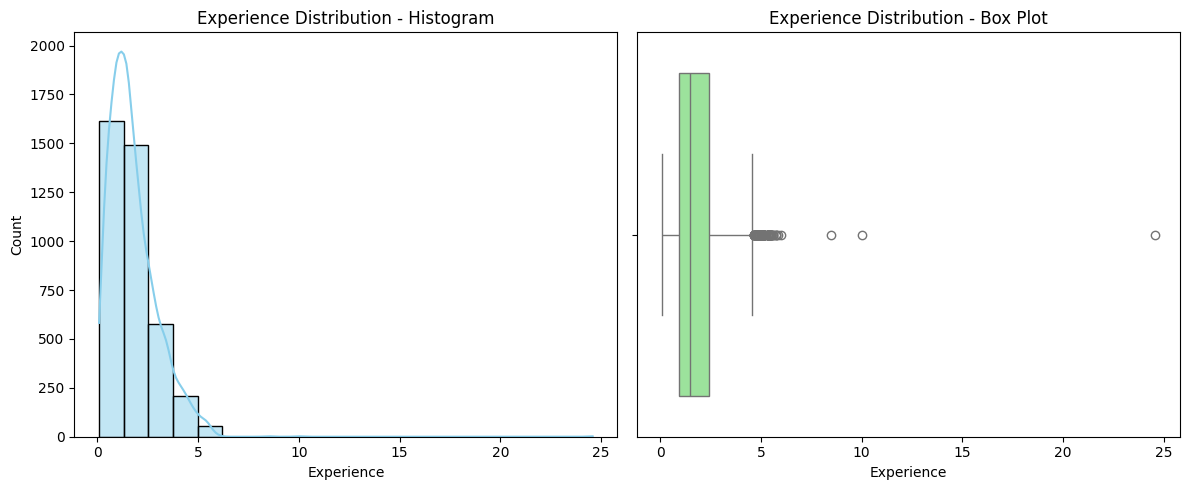

In [71]:
plt.figure(figsize=(12, 5))

# Subplot 1: Histogram for Experience
plt.subplot(1, 2, 1)
sns.histplot(amcat_clean['Experience'], bins=20, kde=True, color='skyblue')
plt.title('Experience Distribution - Histogram')

# Subplot 2: Box Plot for Experience
plt.subplot(1, 2, 2)
sns.boxplot(x=amcat_clean['Experience'], color='lightgreen')
plt.title('Experience Distribution - Box Plot')

# Display the plots
plt.tight_layout()
plt.show()

**OBSERVATION**

---
* The mean experience is 1.28 years, while the median is 1 year, indicating most individuals have around **1 year** of experience.

* A standard deviation of 1.23 years shows a moderate spread, with most individuals having relatively **low work experience**.

* The interquartile range (IQR) is between 0 and 2 years, suggesting many are **fresh graduates** or **early** in their careers.

* The maximum experience is 24 years, an extreme outlier, as the 75th percentile is only 2 years, showing a few individuals with significantly higher experience.


#### 3.2 Categorical Variables

In [72]:
# Frequency Distribution of Categorical Variables
print("Frequency Distribution of Categorical Variables:")
for column in amcat_clean.select_dtypes(include='object').columns:
    print(f"\nFrequency Distribution for {column}:")
    print(amcat_clean[column].value_counts())

Frequency Distribution of Categorical Variables:

Frequency Distribution for ID:
ID
203097    1
415282    1
707108    1
322657    1
108902    1
         ..
240133    1
626815    1
940518    1
355018    1
324966    1
Name: count, Length: 3943, dtype: int64

Frequency Distribution for Designation:
Designation
Software Engineer                    535
Software Developer                   262
System Engineer                      202
Programmer Analyst                   139
Systems Engineer                     117
                                    ... 
Human Resources Intern                 1
Senior Quality Assurance Engineer      1
Clerical Assistant                     1
Delivery Software Engineer             1
Jr. Software Developer                 1
Name: count, Length: 416, dtype: int64

Frequency Distribution for JobCity:
JobCity
Bengaluru    1131
Noida         413
Hyderabad     363
Pune          323
Chennai       311
             ... 
Sadulpur        1
Bundi           1
Jhansi      

##### 1. Gender

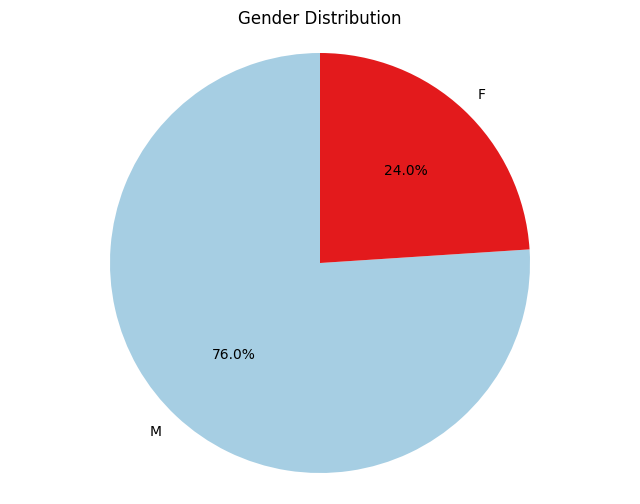

In [73]:
gender_counts = amcat_clean['Gender'].value_counts()

colors = [sns.color_palette("Paired")[0], sns.color_palette("Paired")[5]]

# Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

**OBSERVATION**

---
* **76%** of the candidates are **male** (2998 candidates), while **24**% of the candidates are **female** (945 candidates).
* This indicates a significant **gender imbalance**, with nearly three times more male candidates than female candidates in the dataset.

##### 2. JobCity

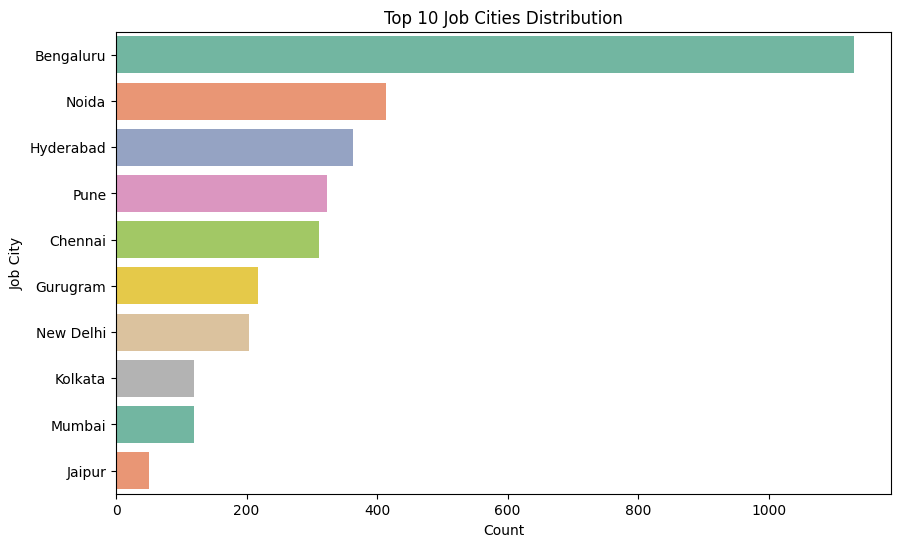

In [74]:
# Get the top 10 most frequent JobCity values
top_10_cities = amcat_clean['JobCity'].value_counts().nlargest(10)

# Count Plot
plt.figure(figsize=(10, 6))
sns.countplot(y='JobCity', data=amcat_clean, order=top_10_cities.index, palette="Set2")

plt.title('Top 10 Job Cities Distribution')
plt.xlabel('Count')
plt.ylabel('Job City')

plt.show()

**OBSERVATION**

---
* The bar chart illustrates the distribution of job locations across various cities.
* A key insight from the plot is that **Bangalore** stands out as the most popular job location, with over 1,000 employees, making it the top provider of jobs among the cities displayed.
* Following Bangalore, Noida and Hyderabad rank as the second and third most common job locations, respectively, while Jaipur ranks lowest among the top 10 cities.

##### 3. Designation

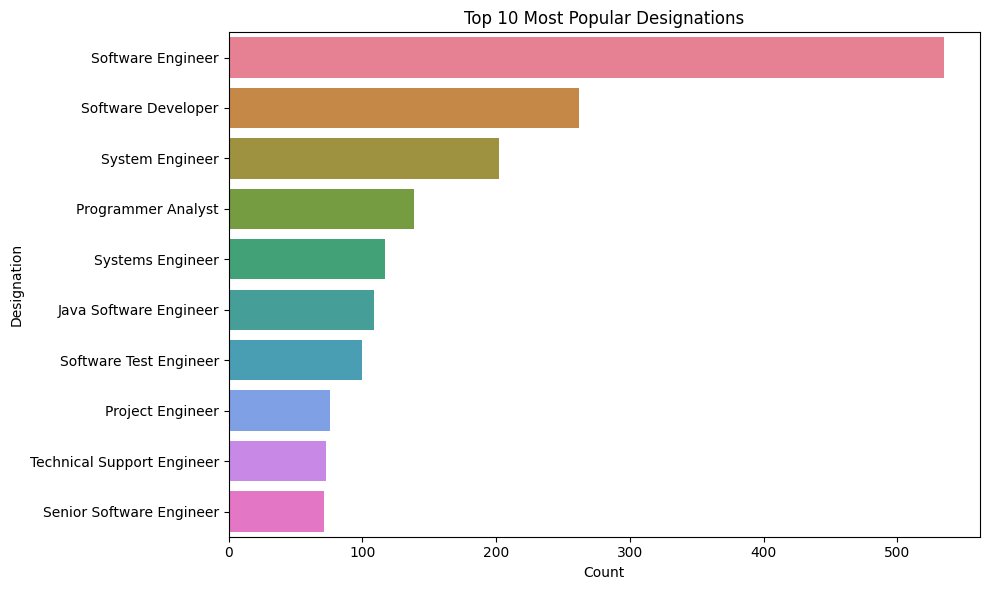

In [75]:
# Get the top 10 most frequent Designations
top_10_designations = amcat_clean['Designation'].value_counts().nlargest(10)

# Count Plot
plt.figure(figsize=(10, 6))
sns.countplot(y='Designation', data=amcat_clean, order=top_10_designations.index, palette="husl")

plt.title('Top 10 Most Popular Designations')
plt.xlabel('Count')
plt.ylabel('Designation')

plt.tight_layout()
plt.show()

**OBSERVATION**

---
* Since there are numerous designations in the dataset, only the top 10 or most popular designations were analyzed.
* The results show that **Software Engineer** is the most common designation among candidates.

##### 4. CollegeState

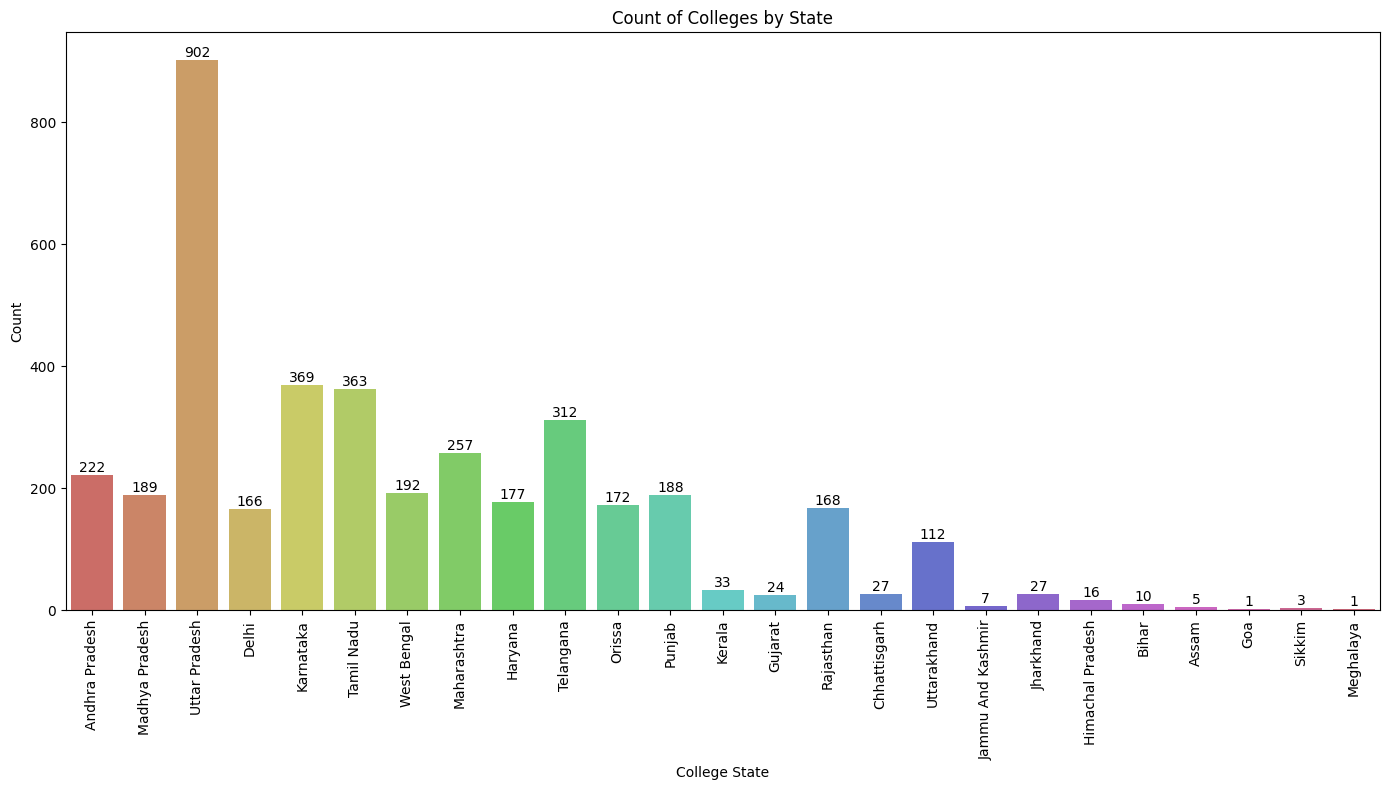

In [76]:
# Count Plot
plt.figure(figsize=(14, 8))  # Increase the figure size
ax = sns.countplot(x='CollegeState', data=amcat_clean, palette="hls")

plt.title('Count of Colleges by State')
plt.xlabel('College State')
plt.ylabel('Count')

plt.xticks(rotation=90)

# Annotate bars with the count
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                fontsize=10)

plt.tight_layout()
plt.show()

**OBSERVATION**

---

* A large number of employees in the dataset graduated from colleges in **Uttar Pradesh**.

##### 5. Degree & Specialisation

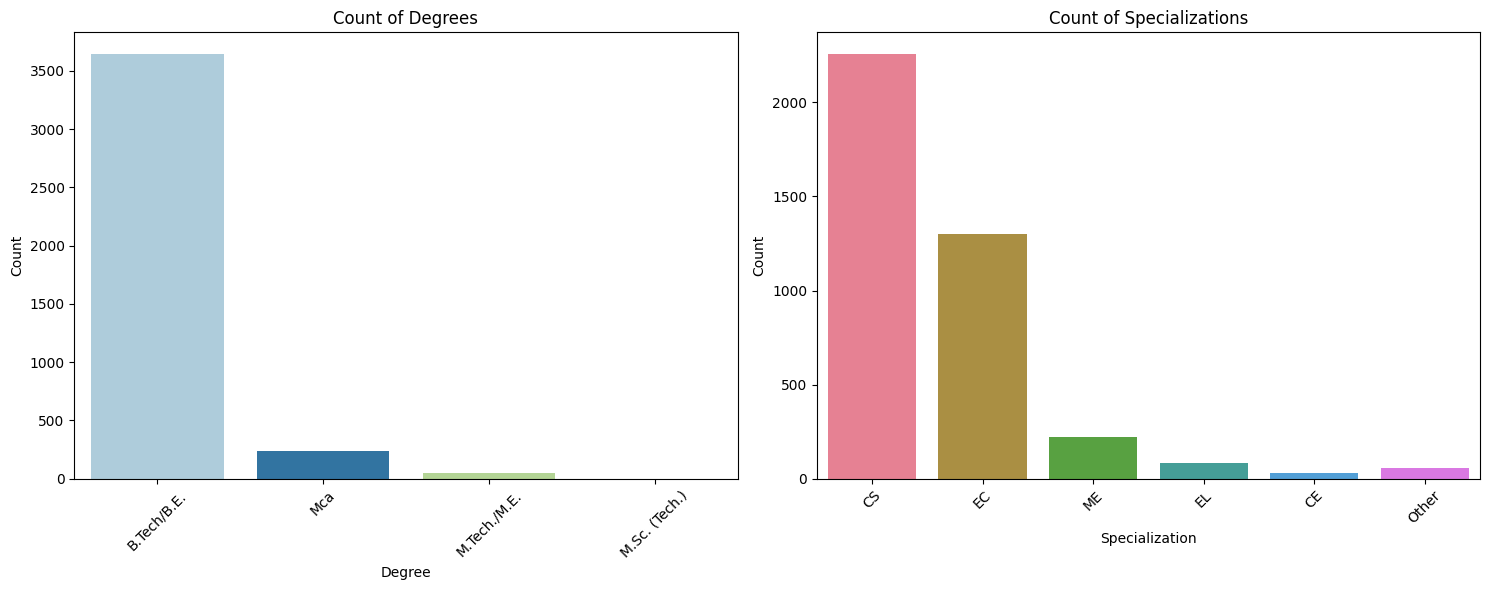

In [77]:
# Create subplots for Degree and Specialization
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Bar plot for Degree
sns.countplot(x='Degree', data=amcat_clean, palette="Paired", ax=axes[0])
axes[0].set_title('Count of Degrees')
axes[0].set_xlabel('Degree')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Bar plot for Specialization
sns.countplot(x='Specialization', data=amcat_clean, palette="husl", ax=axes[1])
axes[1].set_title('Count of Specializations')
axes[1].set_xlabel('Specialization')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**OBSERVATION**

---
* From the bar chart, **B.Tech/B.E** is the dominant degree with over 3,500 occurrences, while MCA follows with significantly fewer entries.
* M.Tech/M.E and M.Sc.(Tech.) have minimal representation, emphasizing the overwhelming prevalence of B.Tech/B.E degrees.

* In terms of specialization, **Computer Science** (CS) is the most popular, followed by Electronics and Communication (EC), reflecting a higher interest or demand in these fields.



##### 6. 10Board & 12Board

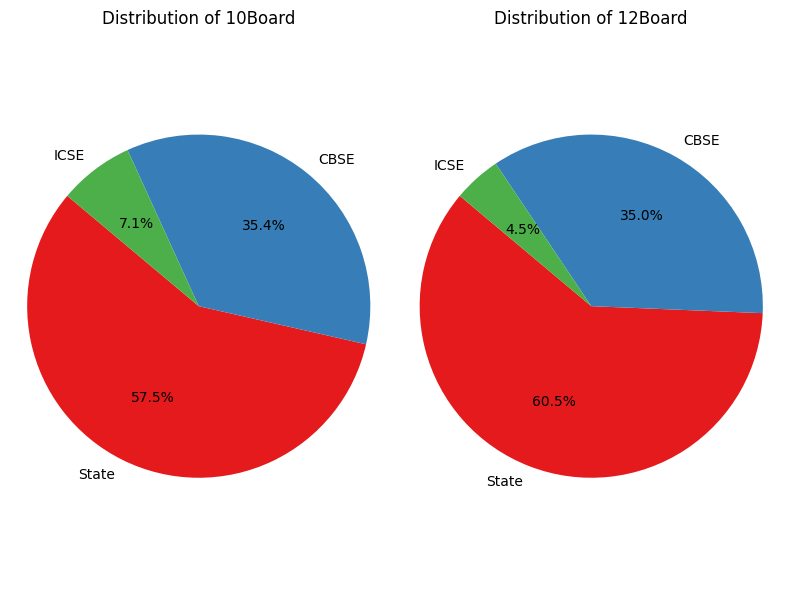

In [78]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(8, 6))

# Pie chart for 10Board
college_tier_counts = amcat_clean['10Board'].value_counts()
axes[0].pie(college_tier_counts, labels=college_tier_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set1"))
axes[0].set_title('Distribution of 10Board')
axes[0].axis('equal')

# Pie chart for 12Board
college_city_tier_counts = amcat_clean['12Board'].value_counts()
axes[1].pie(college_city_tier_counts, labels=college_city_tier_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set1"))
axes[1].set_title('Distribution of 12Board')
axes[1].axis('equal')


plt.tight_layout()
plt.show()

**OBSERVATION**

---
* After categorizing 10th and 12th board exams into State, CBSE, and ICSE boards, the majority of students come from **State** boards in both 10th and 12th grades.

### 4. Bivariate Analysis

#### 4.1 Numerical vs Numerical

In [79]:
# Remove Outliers in the Salary Column

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = amcat_clean['Salary'].quantile(0.25)
Q3 = amcat_clean['Salary'].quantile(0.75)

# Calculate Interquartile Range (IQR)
IQR = Q3 - Q1

# Define bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify rows with Salary outliers
outliers = amcat_clean[(amcat_clean['Salary'] < lower_bound) | (amcat_clean['Salary'] > upper_bound)]

# Calculate the percentage of outliers in the total dataset
outlier_percentage = (outliers.shape[0] / amcat_clean.shape[0]) * 100

# Data Dimension
print(f"Data Dimesion: {amcat_clean.shape}")

# Display the number of outliers and the percentage of outliers in the dataset
print(f"Number of outliers: {outliers.shape[0]}")
print(f"Percentage of outliers: {outlier_percentage:.2f}%")

# Remove outliers from the dataset
amcat_clean = amcat_clean[(amcat_clean['Salary'] >= lower_bound) & (amcat_clean['Salary'] <= upper_bound)]

# Confirm Changes
print(f"Data Dimension after removing outliers: {amcat_clean.shape}")

Data Dimesion: (3943, 38)
Number of outliers: 104
Percentage of outliers: 2.64%
Data Dimension after removing outliers: (3839, 38)


* Given the presence of a notable number of **outliers** in the **Salary** column, these outliers are being **removed** to ensure the **accuracy** and **reliability** of the subsequent analysis.

##### 1. Salary vs CollegeGPA

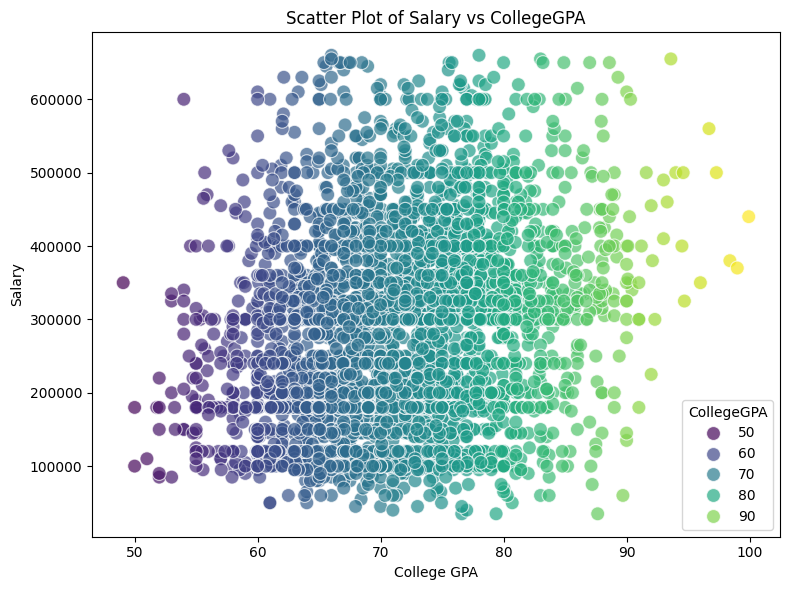

In [80]:
# Set plot size
plt.figure(figsize=(8, 6))

# Create scatter plot
sns.scatterplot(x='CollegeGPA', y='Salary', data=amcat_clean, hue='CollegeGPA', palette='viridis', s=100, alpha=0.7)

# Add labels and title
plt.title('Scatter Plot of Salary vs CollegeGPA')
plt.xlabel('College GPA')
plt.ylabel('Salary')

# Show plot
plt.tight_layout()
plt.show()

**OBSERVATION**

---

* Salaries vary widely across all GPA levels, with most salaries falling below 400,000, showing an even spread regardless of GPA.
  
* High salaries are observed across different GPA levels, suggesting that **College GPA alone may not strongly determine Salary**, though some high-GPA individuals earn higher salaries.

* Most data points are concentrated in the **mid-range of GPAs (60-80)** and salaries up to 400,000, with only a few outliers at both extremes.

##### 2. Salary vs Age

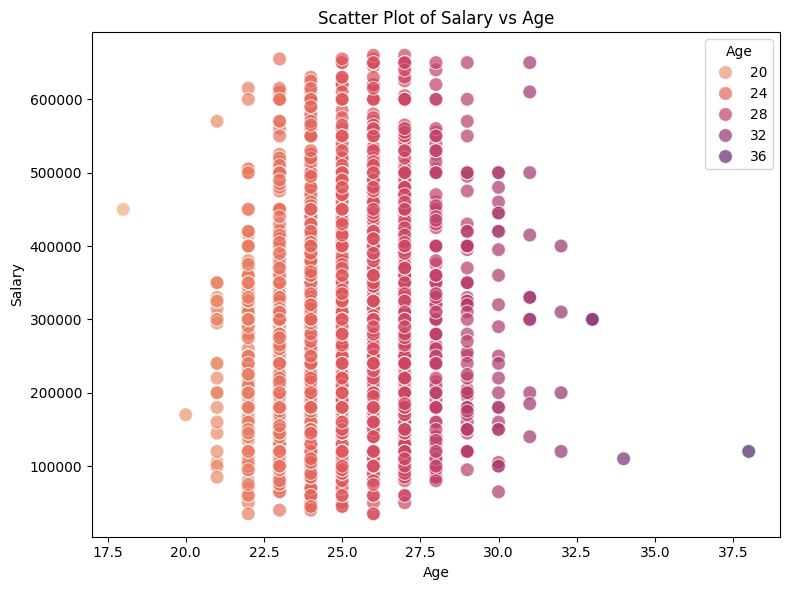

In [81]:
# Set plot size
plt.figure(figsize=(8, 6))

# Create scatter plot
sns.scatterplot(x='Age', y='Salary', data=amcat_clean, hue='Age', palette='flare', s=100, alpha=0.7)

# Add labels and title
plt.title('Scatter Plot of Salary vs Age')
plt.xlabel('Age')
plt.ylabel('Salary')

# Show plot
plt.tight_layout()
plt.show()

**OBSERVATION**

---
* Salaries vary widely across all age groups, with most data points clustered between ages 22 and 30, indicating salary distribution is not solely dependent on age.

* While younger individuals tend to have lower salaries, some outliers earn high salaries at younger ages. Overall, salary levels within each age group vary, showing no clear linear relationship between age and salary.

##### 3. Salary vs Experience

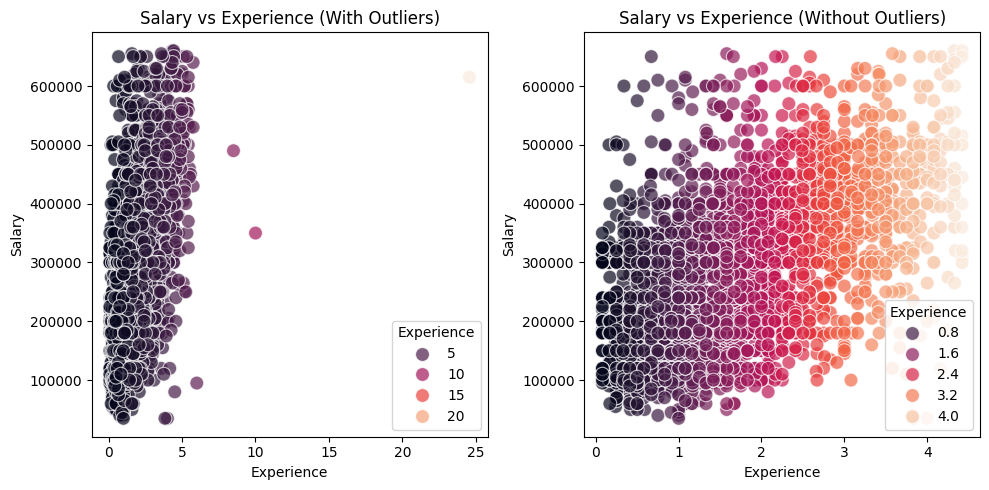

In [82]:
# Function to detect and remove outliers based on the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Plot 1: Scatter plot WITH outliers
plt.figure(figsize=(10, 5))

# Create scatter plot with outliers
plt.subplot(1, 2, 1)  # Left subplot
sns.scatterplot(x='Experience', y='Salary', data=amcat_clean, hue='Experience', palette='rocket', s=100, alpha=0.7)
plt.title('Salary vs Experience (With Outliers)')
plt.xlabel('Experience')
plt.ylabel('Salary')

# Plot 2: Scatter plot WITHOUT outliers
# Remove outliers from the 'Experience' column
amcat_clean_no_outliers = remove_outliers(amcat_clean, 'Experience')

plt.subplot(1, 2, 2)  # Right subplot
sns.scatterplot(x='Experience', y='Salary', data=amcat_clean_no_outliers, hue='Experience', palette='rocket', s=100, alpha=0.7)
plt.title('Salary vs Experience (Without Outliers)')
plt.xlabel('Experience')
plt.ylabel('Salary')

# Adjust layout and show the plots side by side
plt.tight_layout()
plt.show()

**OBSERVATION**

---

**With Outliers**: The left plot, including outliers, shows a skewed salary range for individuals with low experience (0-5 years), making it difficult to identify trends among the majority.

**Without Outliers**: The right plot, which excludes outliers, reveals a clearer and more coherent pattern of salary growth with experience. Most salaries are concentrated under 1 million, highlighting a more realistic distribution for those with fewer years of experience.


#### 4.2 Numerical vs Categorical

##### 1. Salary vs Gender

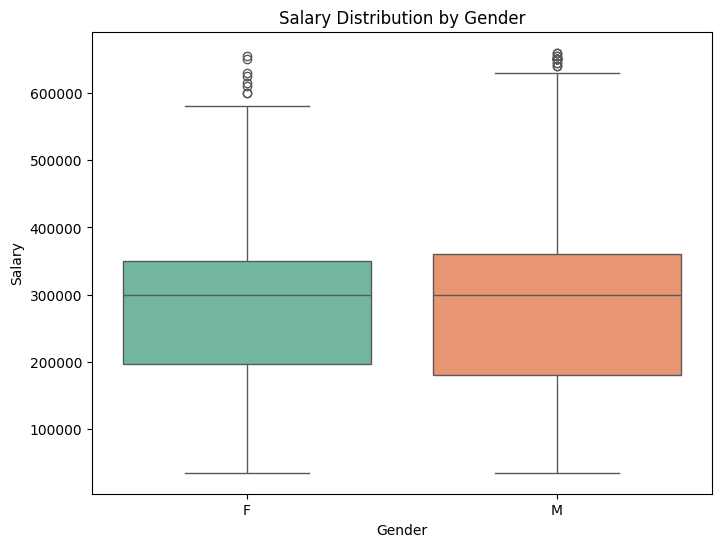

In [83]:
# Create a box plot for Gender vs Salary
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Salary', data=amcat_clean, palette="Set2")

# Add labels and title
plt.title('Salary Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Salary')

# Show plot
plt.show()

**OBSERVATION**

---
* Both genders have a similar median salary, as indicated by the central line inside the boxes, with little difference between male and female salaries at the median level.
* The interquartile range (IQR) is slightly wider for males, indicating more variability in salary for males compared to females. The whiskers for males extend further, showing a wider overall salary range.
* Both genders exhibit outliers, but there are more extreme high outliers among males, with a few notable cases showing significantly higher salaries for males compared to females.

##### 2. Salary vs JobCity

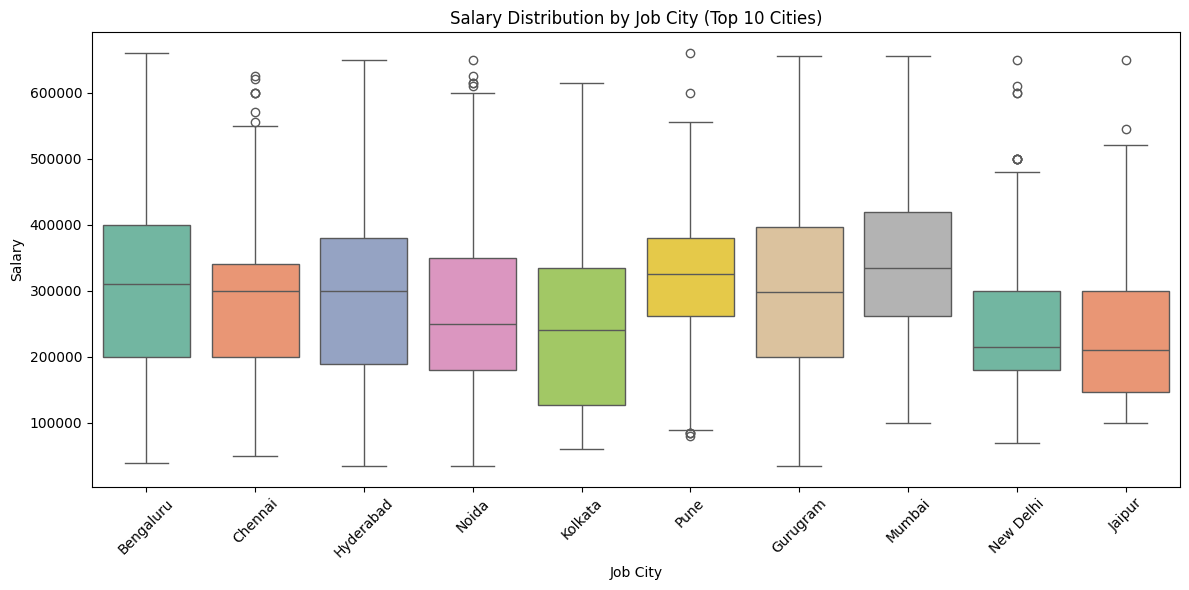

In [84]:
# Get the top 10 cities by frequency
top_10_cities = amcat_clean['JobCity'].value_counts().nlargest(10).index

# Filter the data to include only the top 10 cities
filtered_data = amcat_clean[amcat_clean['JobCity'].isin(top_10_cities)]

# Create a box plot for JobCity vs Salary
plt.figure(figsize=(12, 6))
sns.boxplot(x='JobCity', y='Salary', data=filtered_data, palette="Set2")

# Add labels and title
plt.title('Salary Distribution by Job City (Top 10 Cities)')
plt.xlabel('Job City')
plt.ylabel('Salary')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

**OBSERVATION**

---
* The median salary across the top 10 cities is fairly consistent, with Bengaluru and Pune showing slightly higher medians compared to the rest of the cities.
* The range of salary variation (spread of the box and whiskers) differs by city, with cities like Bengaluru and Pune exhibiting wider salary ranges, while cities like Kolkata and Jaipur show relatively less variation.
* Most cities have outliers, but Bengaluru and Mumbai feature the most extreme high salaries, with Bengaluru having a notable outlier close to 4 million, indicating higher earning potential in Bengaluru.

##### 3. Salary vs Designation

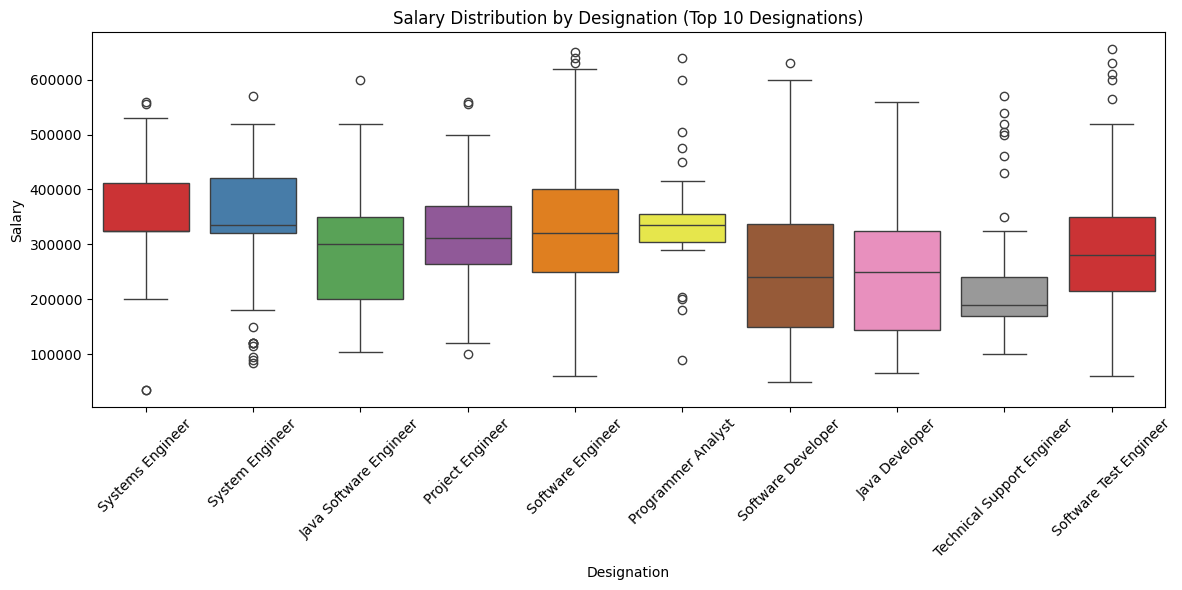

In [85]:
# Get the top 10 cities by frequency
top_10_cities = amcat_clean['Designation'].value_counts().nlargest(10).index

# Filter the data to include only the top 10 cities
filtered_data = amcat_clean[amcat_clean['Designation'].isin(top_10_cities)]

# Create a box plot for JobCity vs Salary
plt.figure(figsize=(12, 6))
sns.boxplot(x='Designation', y='Salary', data=filtered_data, palette="Set1")

# Add labels and title
plt.title('Salary Distribution by Designation (Top 10 Designations)')
plt.xlabel('Designation')
plt.ylabel('Salary')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

**OBSERVATION**

---

* The median salary differs significantly across the top 10 designations, with Senior Software Engineer having a noticeably higher median compared to other roles.
* Most designations show a wide salary range, with many outliers present, especially for Senior Software Engineer, Software Engineer, and Programmer Analyst, which have higher salaries and more extreme values.
* System Engineer has a relatively smaller salary range, with salaries clustered around lower values, while Java Software Engineer shows fewer extreme outliers but still exhibits a broad salary distribution.

##### 4. Salary vs Degree

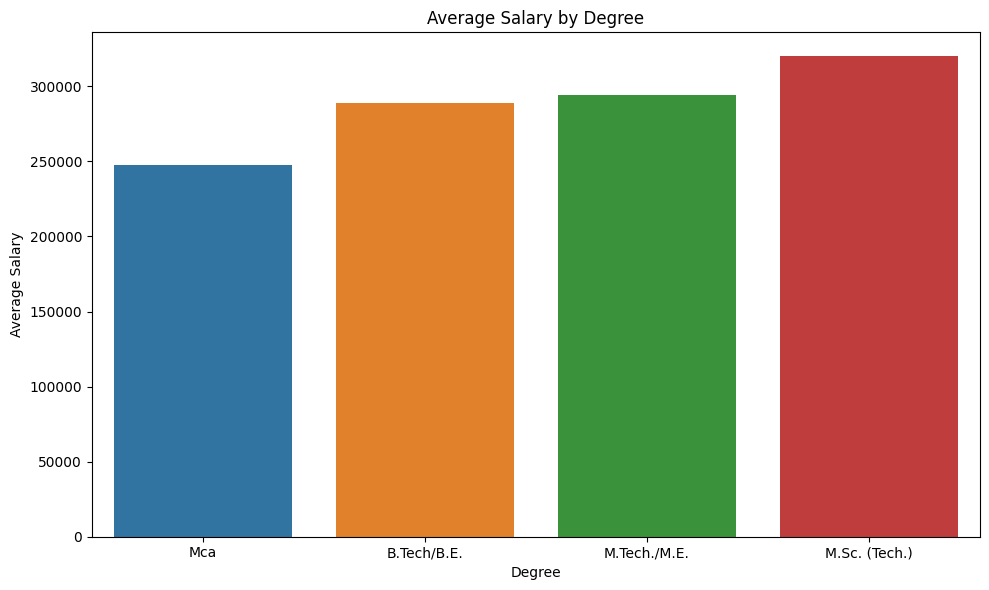

In [86]:
# Calculate mean salary for each degree
mean_salaries_degree = amcat_clean.groupby('Degree')['Salary'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=mean_salaries_degree.index, y=mean_salaries_degree.values, palette="tab10")

plt.title('Average Salary by Degree')
plt.xlabel('Degree')
plt.ylabel('Average Salary')

plt.xticks(rotation=0)  # Optional: Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

**OBSERVATION**

---

* Individuals with an M.Tech./M.E. degree have the highest average salary compared to other degrees, leading the chart.
*  Degrees like B.Tech./B.E. and M.Sc. (Tech.) also result in relatively high average salaries, highlighting the value of technical education.
*  MCA degree holders, while earning competitive salaries, have the lowest average salary among the degree groups presented.

##### 5. Salary vs Specialisation

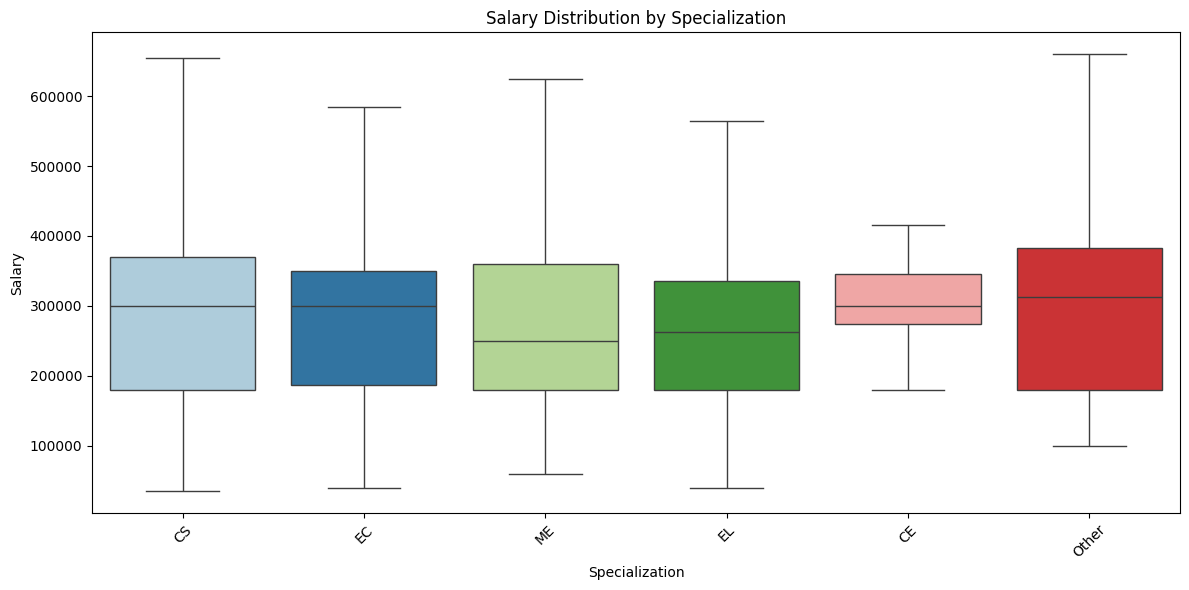

In [87]:
# Box Plot for Salary vs. Specialization
plt.figure(figsize=(12, 6))
sns.boxplot(x='Specialization', y='Salary', data=amcat_clean, palette="Paired", showfliers=False)
plt.title('Salary Distribution by Specialization')
plt.xlabel('Specialization')
plt.ylabel('Salary')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

**OBSERVATION**

---
* Computer Science (CS) and Other specializations have the highest median salary and show broader salary distribution ranges compared to others.
*  Mechanical Engineering (ME) and Electrical Engineering (EL) have lower median salaries than CS but still display a significant range of salary variation.
*  Civil Engineering (CE) shows a smaller salary range and a relatively lower median salary, with outliers present across most specializations, indicating wide salary variation depending on the role or company.

### 5. Research Questions

##### 1. Validate Industry Salary Claims for Fresh Graduates


Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.

In [88]:
# Filter for relevant job roles
relevant_roles = ['Programming Analyst', 'Software Engineer', 'Hardware Engineer', 'Associate Engineer']
filtered_data = amcat_clean[amcat_clean['Designation'].isin(relevant_roles)]

# Calculate average salary for the relevant roles
average_salary = filtered_data['Salary'].mean()

# Display the average salary and compare with the claim
print(f'Average Salary for selected roles: ₹{average_salary:.2f}')

# Check if it falls within the claimed range
if 250000 <= average_salary <= 300000:
    print("The average salary falls within the claimed range of 2.5-3 lakhs.")
else:
    print("The average salary does not fall within the claimed range.")

Average Salary for selected roles: ₹327042.91
The average salary does not fall within the claimed range.


##### 2. Evaluate Gender-Specialization Relationship

Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?)

Specialization  CE    CS   EC  EL   ME  Other
Gender                                       
F                5   582  297  16   12     14
M               19  1617  978  64  197     38


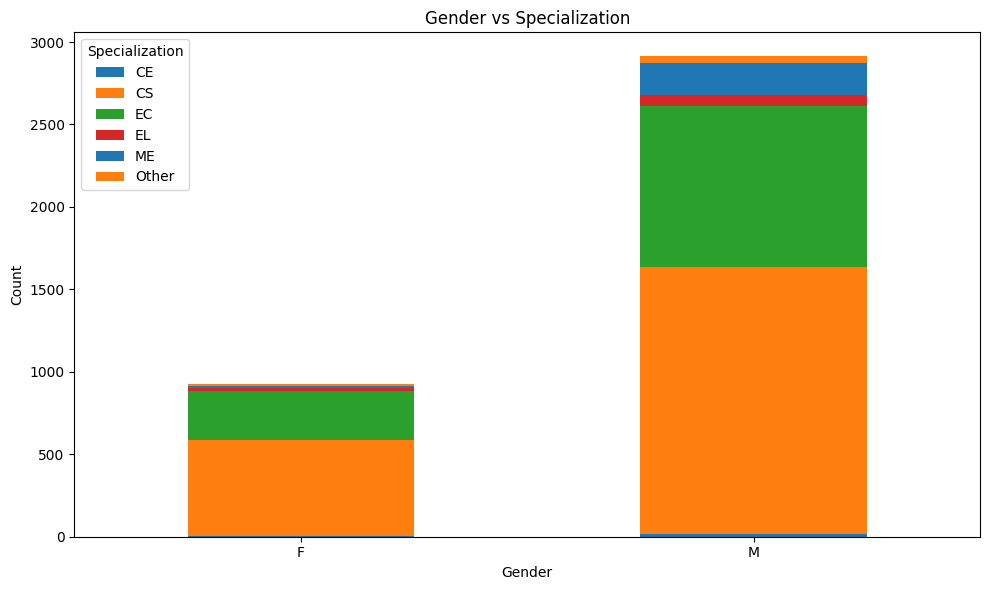

Chi-squared Test Statistic: 46.77, p-value: 0.0000
There is a significant relationship between Gender and Specialization.


In [89]:
# Create a contingency table
contingency_table = pd.crosstab(amcat_clean['Gender'], amcat_clean['Specialization'])

# Display the contingency table
print(contingency_table)

# Create a stacked bar plot
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Gender vs Specialization')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(title='Specialization')
plt.tight_layout()
plt.show()

# Chi-squared test
from scipy.stats import chi2_contingency

chi2, p, _, _ = chi2_contingency(contingency_table)
print(f'Chi-squared Test Statistic: {chi2:.2f}, p-value: {p:.4f}')
if p < 0.05:
    print("There is a significant relationship between Gender and Specialization.")
else:
    print("There is no significant relationship between Gender and Specialization.")

##### 3. Are Top Cities Driving Higher Salaries?

<ipython-input-90-6ed85953a6a7>:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cleaned_data = filtered_data.groupby('JobCity').apply(lambda x: remove_outliers(x, 'Salary')).reset_index(drop=True)


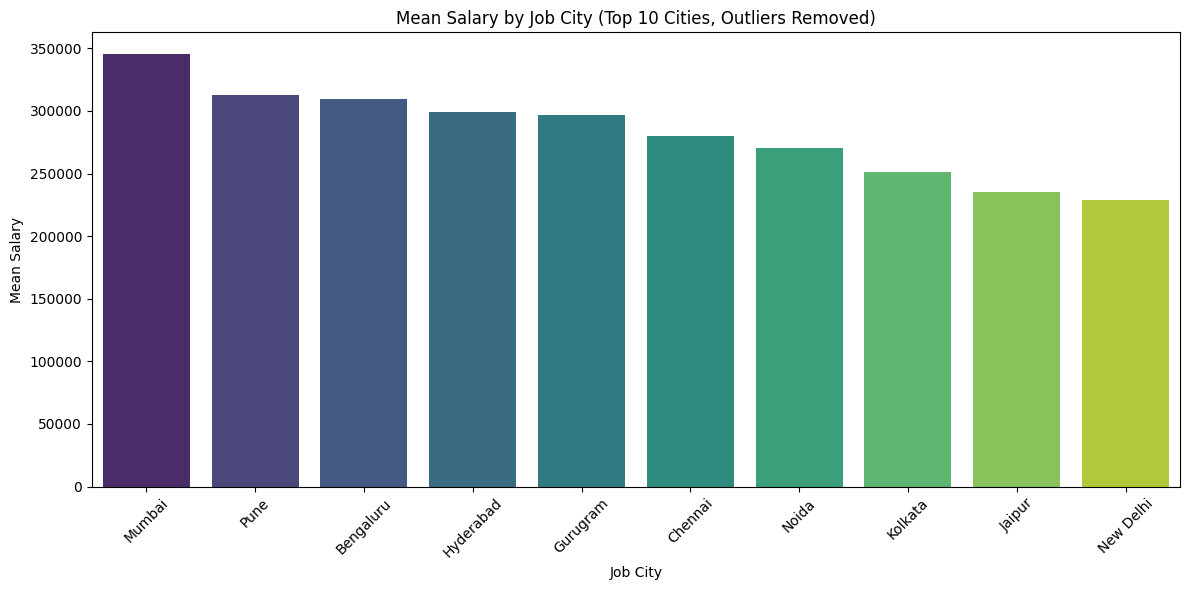

In [90]:
# Function to remove outliers based on IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Filter data for the top 10 most frequent cities
top_10_cities = amcat_clean['JobCity'].value_counts().nlargest(10).index
filtered_data = amcat_clean[amcat_clean['JobCity'].isin(top_10_cities)]

# Remove outliers from the 'Salary' column for each JobCity
cleaned_data = filtered_data.groupby('JobCity').apply(lambda x: remove_outliers(x, 'Salary')).reset_index(drop=True)

# Calculate the mean salary for each JobCity after removing outliers
mean_salary_by_city = cleaned_data.groupby('JobCity')['Salary'].mean().sort_values(ascending=False)

# Plot the bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x=mean_salary_by_city.index, y=mean_salary_by_city.values, palette='viridis')

# Add labels and title
plt.title('Mean Salary by Job City (Top 10 Cities, Outliers Removed)')
plt.xlabel('Job City')
plt.ylabel('Mean Salary')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

* This graph ranks cities based on their average salaries, with Mumbai having the highest average salary, followed by Pune and Bengaluru.
* There is a noticeable gap in the average salary between the top cities (Mumbai, Pune, Bengaluru) and the bottom cities (New Delhi, Jaipur), with Mumbai having an average salary of over ₹350,000, while New Delhi is around ₹250,000.
* Hence, some cities provide higher-paying opportunities due to the concentration of high-tech industries, while others have more modest salary ranges.

## Conclusion

* The salary distribution is right-skewed, with a mean salary of ₹308,256, indicating higher variability in salaries, as shown by numerous outliers and significant salary range.
* There is no strong correlation between College GPA and Salary, with high salaries observed across various GPA levels.
* Age and salary are not directly related, but younger individuals tend to have lower salaries, with a few outliers earning significantly higher salaries at younger ages.
* Salary increases with experience, although extreme outliers distort this trend. Without outliers, a clearer pattern of salary growth with experience is observed.
* M.Tech./M.E. degree holders earn the highest average salaries, followed by B.Tech./B.E. and M.Sc. (Tech.), while MCA graduates have the lowest average salaries.
* Computer Science graduates have the highest median salaries, followed by Mechanical and Electrical Engineering graduates, with Civil Engineering showing the lowest median salaries and salary range.
* Gender does not significantly impact the median salary, though males exhibit higher variability and a few extreme salary outliers.
* Job location plays a role in salary distribution, with Bengaluru and Pune offering higher median salaries and wider salary ranges compared to other cities.
* Software Engineer is the most common designation, with Senior Software Engineers earning the highest median salaries and wider salary ranges compared to other roles.